In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import statsmodels.api as sm
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import time
from matplotlib.ticker import MaxNLocator

In [ ]:
men_data = pd.read_csv("atp_matches.csv", low_memory = False)

In [ ]:
women_data = pd.read_csv("wta_matches.csv", low_memory = False)

In [ ]:
pom_m = []
for i in range(len(men_data)):
    if men_data.iloc[i, 23][-3:] == "W/O":
        pom_m.append(i)
    if men_data.iloc[i, 23][-3:] == "RET":
        pom_m.append(i)
    if men_data.iloc[i, 23][-3:] == "Jun":
        pom_m.append(i)
    if men_data.iloc[i, 23][-8:] == "finished":
        pom_m.append(i)
    if men_data.iloc[i, 23][-8:] == "Walkover":
        pom_m.append(i)
    if men_data.iloc[i, 23][-8:] == "Apr-00":
        pom_m.append(i)
    if men_data.iloc[i, 23][-8:] == "1-Apr":
        pom_m.append(i)
    if men_data.iloc[i, 23][-20:] == "Played and abandoned":
        pom_m.append(i)
    if men_data.iloc[i, 23] == "In Progress":
        pom_m.append(i)
    if men_data.iloc[i, 23][-3:] == "DEF":
        pom_m.append(i)
    if men_data.iloc[i, 23][-4:] == "Def.":
        pom_m.append(i)
    if men_data.iloc[i, 23][-7:] == "Default":
        pom_m.append(i)
men_data.drop(pom_m, inplace = True)

In [ ]:
pom_w = []
for i in range(len(women_data)):
    if women_data.iloc[i, 23][-3:] == "W/O":
        pom_w.append(i)
    if women_data.iloc[i, 23][-7:-1] == "RET+H6":
        pom_w.append(i)
    if women_data.iloc[i, 23][-3:] == "RET":
        pom_w.append(i)
    if women_data.iloc[i, 23][-3:] == "Jun":
        pom_w.append(i)
    if women_data.iloc[i, 23][-8:] == "finished":
        pom_w.append(i)
    if women_data.iloc[i, 23][-8:] == "Walkover":
        pom_w.append(i)
    if women_data.iloc[i, 23][-8:] == "Apr-00":
        pom_w.append(i)
    if women_data.iloc[i, 23][-8:] == "1-Apr":
        pom_w.append(i)
    if women_data.iloc[i, 23][-20:] == "Played and abandoned":
        pom_w.append(i)
    if women_data.iloc[i, 23] == "In Progress":
        pom_w.append(i)
    if women_data.iloc[i, 23][-3:] == "DEF":
        pom_w.append(i)
    if women_data.iloc[i, 23][-4:] == "Def.":
        pom_w.append(i)
    if women_data.iloc[i, 23][-7:] == "Default":
        pom_w.append(i)
women_data.drop(pom_w, inplace = True)

In [ ]:
men_data['score'].str.len()

0        10
1        11
2         7
3        11
4        10
         ..
67645     7
67646    10
67647    11
67648    11
67649    10
Name: score, Length: 65250, dtype: int64

In [ ]:
women_data['score'].str.len()

0         7
1        10
2         7
3         7
4        11
         ..
62377    11
62378    10
62379     7
62380     7
62381     7
Name: score, Length: 60327, dtype: int64

In [ ]:
men_data = men_data[men_data['w_ace'].notna()]
men_data = men_data[men_data['w_df'].notna()]
men_data = men_data[men_data['w_svpt'].notna()]
men_data = men_data[men_data['w_1stIn'].notna()]
men_data = men_data[men_data['w_1stWon'].notna()]
men_data = men_data[men_data['w_2ndWon'].notna()]
men_data = men_data[men_data['w_SvGms'].notna()]
men_data = men_data[men_data['w_bpSaved'].notna()]
men_data = men_data[men_data['w_bpFaced'].notna()]
men_data = men_data[men_data['l_ace'].notna()]
men_data = men_data[men_data['l_df'].notna()]
men_data = men_data[men_data['l_svpt'].notna()]
men_data = men_data[men_data['l_1stIn'].notna()]
men_data = men_data[men_data['l_1stWon'].notna()]
men_data = men_data[men_data['l_2ndWon'].notna()]
men_data = men_data[men_data['l_SvGms'].notna()]
men_data = men_data[men_data['l_bpSaved'].notna()]
men_data = men_data[men_data['l_bpFaced'].notna()]

In [ ]:
women_data = women_data[women_data['w_ace'].notna()]
women_data = women_data[women_data['w_df'].notna()]
women_data = women_data[women_data['w_svpt'].notna()]
women_data = women_data[women_data['w_1stIn'].notna()]
women_data = women_data[women_data['w_1stWon'].notna()]
women_data = women_data[women_data['w_2ndWon'].notna()]
women_data = women_data[women_data['w_SvGms'].notna()]
women_data = women_data[women_data['w_bpSaved'].notna()]
women_data = women_data[women_data['w_bpFaced'].notna()]
women_data = women_data[women_data['l_ace'].notna()]
women_data = women_data[women_data['l_df'].notna()]
women_data = women_data[women_data['l_svpt'].notna()]
women_data = women_data[women_data['l_1stIn'].notna()]
women_data = women_data[women_data['l_1stWon'].notna()]
women_data = women_data[women_data['l_2ndWon'].notna()]
women_data = women_data[women_data['l_SvGms'].notna()]
women_data = women_data[women_data['l_bpSaved'].notna()]
women_data = women_data[women_data['l_bpFaced'].notna()]

In [ ]:
women_data['score'].str.len()

37033     7
37034    11
37035    10
37036     7
37037    10
         ..
62165    11
62166     7
62167    11
62168     7
62169     7
Name: score, Length: 20186, dtype: int64

In [ ]:
men_data['score'].str.len()

0        10
1        11
2         7
3        11
4        10
         ..
67549     7
67550     7
67551    14
67552     7
67553     7
Name: score, Length: 59828, dtype: int64

In [ ]:
length_m = men_data['score'].str.len()
length_w = women_data['score'].str.len()

In [ ]:
D = np.array(length_m)
w_gm1 = []
l_gm1 = []
w_gm2 = []
l_gm2 = []
w_gm3 = []
l_gm3 = []
w_gm4 = []
l_gm4 = []
w_gm5 = []
l_gm5 = []
for i in range(len(D)):
    d = men_data.iloc[i, 23]
    if d[-1] == " ":
        d = d[:-1]
    if D[i] > 4:
        if d[3] == "(":
            if d[5] == ")":
                d = d[:3] + d[6:]
                D[i] = D[i] - 3
            else:
                d = d[:3] + d[7:]
                D[i] = D[i] - 4
    if D[i] > 8:
        if d[7] == "(":
            if d[9] == ")":
                d = d[:7] + d[10:]
                D[i] = D[i] - 3
            else:
                d = d[:7] + d[11:]
                D[i] = D[i] - 4
    if D[i] > 12:
        if d[11] == "(":
            if d[13] == ")":
                d = d[:11] + d[14:]
                D[i] = D[i] - 3
            else:
                d = d[:11] + d[15:]
                D[i] = D[i] - 4
    if D[i] > 16:
        if d[15] == "(":
            if d[17] == ")":
                d = d[:15] + d[18:]
                D[i] = D[i] - 3
            else:
                d = d[:15] + d[19:]
                D[i] = D[i] - 4
    if D[i] > 20:
        if d[19] == "(":
            if d[21] == ")":
                d = d[:19] + d[22:]
                D[i] = D[i] - 3
            else:
                d = d[:19] + d[23:]
                D[i] = D[i] - 4

    w_gm1.append(d[0])
    l_gm1.append(d[2])
    w_gm2.append(d[4])
    l_gm2.append(d[6])

    if D[i] > 8:
        if d[8] == "[":
            if d[10] == "-":
                w_gm3.append(d[9])
                l_gm3.append(d[11])
            else:
                w_gm3.append(d[9:11])
                if d[13] == "]":
                    l_gm3.append(d[12])
                else:
                    l_gm3.append(d[12:14])
        if d[10] == "-":
            if d[-1] != "]":
                w_gm3.append(d[8:10])
                l_gm3.append(d[11:])
        if d[9] == "-":
            w_gm3.append(d[8])
            l_gm3.append(d[10])
    else:
        w_gm3.append("")
        l_gm3.append("")

    if D[i] > 14:
        if d[8] == "[":
            w_gm4.append("")
            l_gm4.append("")
        else:
            w_gm4.append(d[12])
            l_gm4.append(d[14])
    else:
        w_gm4.append("")
        l_gm4.append("")

    if D[i] > 16:
        if d[17] == "-":
            w_gm5.append(d[16])
            l_gm5.append(d[18])
        else:
            w_gm5.append(d[16:18])
            if D[i] > 21:
                l_gm5.append(d[19:21])
            else:
                l_gm5.append(d[19:])
    else:
        w_gm5.append("")
        l_gm5.append("")


In [ ]:
men_data["w_gm1"] = w_gm1
men_data["w_gm2"] = w_gm2
men_data["w_gm3"] = w_gm3
men_data["w_gm4"] = w_gm4
men_data["w_gm5"] = w_gm5
men_data["l_gm1"] = l_gm1
men_data["l_gm2"] = l_gm2
men_data["l_gm3"] = l_gm3
men_data["l_gm4"] = l_gm4
men_data["l_gm5"] = l_gm5

In [ ]:
D = np.array(length_w)
w_gm1 = []
l_gm1 = []
w_gm2 = []
l_gm2 = []
w_gm3 = []
l_gm3 = []
for i in range(len(D)):
    d = women_data.iloc[i, 23]
    if d[-1] == " ":
        d = d[:-1]
    if D[i] > 4:
        if d[3] == "(":
            if d[5] == ")":
                d = d[:3] + d[6:]
                D[i] = D[i] - 3
            else:
                d = d[:3] + d[7:]
                D[i] = D[i] - 4
    if D[i] > 8:
        if d[7] == "(":
            if d[9] == ")":
                d = d[:7] + d[10:]
                D[i] = D[i] - 3
            else:
                d = d[:7] + d[11:]
                D[i] = D[i] - 4
    if D[i] > 12:
        if d[11] == "(":
            if d[13] == ")":
                d = d[:11] + d[14:]
                D[i] = D[i] - 3
            else:
                d = d[:11] + d[15:]
                D[i] = D[i] - 4

    w_gm1.append(d[0])
    l_gm1.append(d[2])
    w_gm2.append(d[4])
    l_gm2.append(d[6])
    k = 1

    if D[i] > 8:
        if d[8] == "[":
            if d[10] == "-":
                w_gm3.append(d[9])
                l_gm3.append(d[11])
                k = 2
            else:
                w_gm3.append(d[9:11])
                if d[13] == "]":
                    l_gm3.append(d[12])
                    k = 2
                else:
                    l_gm3.append(d[12:14])
                    k = 2
        if d[10] == "-":
            if d[-1] != "]":
                w_gm3.append(d[8:10])
                l_gm3.append(d[11:])
                k = 2
        if d[9] == "-":
            w_gm3.append(d[8])
            l_gm3.append(d[10])
            k = 2
    else:
        w_gm3.append("")
        l_gm3.append("")
        k = 2
    if k == 1:
        print(i, k)


In [ ]:
women_data["w_gm1"] = w_gm1
women_data["w_gm2"] = w_gm2
women_data["w_gm3"] = w_gm3
women_data["l_gm1"] = l_gm1
women_data["l_gm2"] = l_gm2
women_data["l_gm3"] = l_gm3

In [ ]:
aces_m = []
df_m = []
svpt_m = []
stIn_m = []
stWon_m = []
ndWon_m = []
SvGms_m = []
bpSaved_m = []
bpFaced_m = []
for i in range(len(men_data)):
    aces_m.append(men_data.iloc[i, 27])
    aces_m.append(men_data.iloc[i, 36])
    df_m.append(men_data.iloc[i, 28])
    df_m.append(men_data.iloc[i, 37])
    svpt_m.append(men_data.iloc[i, 29])
    svpt_m.append(men_data.iloc[i, 38])
    stIn_m.append(men_data.iloc[i, 30])
    stIn_m.append(men_data.iloc[i, 39])
    stWon_m.append(men_data.iloc[i, 31])
    stWon_m.append(men_data.iloc[i, 40])
    ndWon_m.append(men_data.iloc[i, 32])
    ndWon_m.append(men_data.iloc[i, 41])
    SvGms_m.append(men_data.iloc[i, 33])
    SvGms_m.append(men_data.iloc[i, 42])
    bpSaved_m.append(men_data.iloc[i, 34])
    bpSaved_m.append(men_data.iloc[i, 43])
    bpFaced_m.append(men_data.iloc[i, 35])
    bpFaced_m.append(men_data.iloc[i, 44])

In [ ]:
aces_w = []
df_w = []
svpt_w = []
stIn_w = []
stWon_w = []
ndWon_w = []
SvGms_w = []
bpSaved_w = []
bpFaced_w = []
for i in range(len(women_data)):
    aces_w.append(women_data.iloc[i, 27])
    aces_w.append(women_data.iloc[i, 36])
    df_w.append(women_data.iloc[i, 28])
    df_w.append(women_data.iloc[i, 37])
    svpt_w.append(women_data.iloc[i, 29])
    svpt_w.append(women_data.iloc[i, 38])
    stIn_w.append(women_data.iloc[i, 30])
    stIn_w.append(women_data.iloc[i, 39])
    stWon_w.append(women_data.iloc[i, 31])
    stWon_w.append(women_data.iloc[i, 40])
    ndWon_w.append(women_data.iloc[i, 32])
    ndWon_w.append(women_data.iloc[i, 41])
    SvGms_w.append(women_data.iloc[i, 33])
    SvGms_w.append(women_data.iloc[i, 42])
    bpSaved_w.append(women_data.iloc[i, 34])
    bpSaved_w.append(women_data.iloc[i, 43])
    bpFaced_w.append(women_data.iloc[i, 35])
    bpFaced_w.append(women_data.iloc[i, 44])

![image.png](attachment:image.png)

In [ ]:
y_m = [1, 0] * len(length_m)
y_w = [1, 0] * len(length_w)

In [ ]:
dataframe_m = pd.DataFrame({"win" : y_m, "aces" : aces_m, "df" : df_m, "svpt" : svpt_m, "stIn" : stIn_m, "stWon" : stWon_m,
                          "ndWon" : ndWon_m, "SvGms" : SvGms_m, "bpSaved" : bpSaved_m, "bpFaced" : bpFaced_m})
dataframe_w = pd.DataFrame({"win" : y_w, "aces" : aces_w, "df" : df_w, "svpt" : svpt_w, "stIn" : stIn_w, "stWon" : stWon_w,
                          "ndWon" : ndWon_w, "SvGms" : SvGms_w, "bpSaved" : bpSaved_w, "bpFaced" : bpFaced_w})

In [ ]:
dataframe_m

,win,aces,df,svpt,stIn,stWon,ndWon,SvGms,bpSaved,bpFaced
0,1,5.0,2.0,93.0,58.0,38.0,17.0,10.0,14.0,16.0
1,0,5.0,5.0,66.0,31.0,19.0,15.0,10.0,4.0,8.0
2,1,6.0,2.0,74.0,47.0,36.0,14.0,13.0,0.0,2.0
3,0,14.0,3.0,63.0,37.0,33.0,11.0,12.0,1.0,3.0
4,1,15.0,5.0,64.0,36.0,29.0,17.0,10.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...
119651,0,14.0,5.0,110.0,59.0,45.0,19.0,16.0,3.0,7.0
119652,1,5.0,2.0,42.0,26.0,23.0,10.0,8.0,1.0,1.0
119653,0,2.0,3.0,58.0,32.0,21.0,10.0,9.0,2.0,6.0
119654,1,11.0,0.0,37.0,27.0,26.0,6.0,8.0,0.0,0.0


In [ ]:
dataframe_w

,win,aces,df,svpt,stIn,stWon,ndWon,SvGms,bpSaved,bpFaced
0,1,0.0,1.0,76.0,57.0,35.0,6.0,10.0,4.0,11.0
1,0,0.0,1.0,60.0,37.0,20.0,8.0,10.0,6.0,13.0
2,1,1.0,5.0,76.0,53.0,34.0,7.0,13.0,5.0,9.0
3,0,2.0,8.0,100.0,61.0,36.0,15.0,13.0,6.0,21.0
4,1,5.0,4.0,79.0,49.0,34.0,13.0,11.0,3.0,9.0
...,...,...,...,...,...,...,...,...,...,...
40367,0,2.0,15.0,93.0,55.0,36.0,8.0,12.0,5.0,12.0
40368,1,4.0,3.0,42.0,25.0,19.0,11.0,7.0,3.0,3.0
40369,0,1.0,4.0,49.0,26.0,14.0,6.0,7.0,6.0,11.0
40370,1,6.0,1.0,54.0,27.0,22.0,14.0,9.0,2.0,3.0


In [ ]:
col_names = ["aces", "df", "svpt", "stIn", "stWon", "ndWon", "SvGms", "bpSaved", "bpFaced"]
col_names_pom = ["const"] + col_names

In [ ]:
AU_m = pd.DataFrame(columns = men_data.columns)
US_m = pd.DataFrame(columns = men_data.columns)
WB_m = pd.DataFrame(columns = men_data.columns)
RG_m = pd.DataFrame(columns = men_data.columns)
for i in range(len(men_data["w_df"])):
    if men_data.iloc[i, 1] == "Australian Open":
        AU_m.loc[len(AU_m)] = men_data.iloc[i,]
    if men_data.iloc[i, 1] == "US Open":
        US_m.loc[len(US_m)] = men_data.iloc[i,]
    if men_data.iloc[i, 1] == "Us Open":
        US_m.loc[len(US_m)] = men_data.iloc[i,]
    if men_data.iloc[i, 1] == "Wimbledon":
        WB_m.loc[len(WB_m)] = men_data.iloc[i,]
    if men_data.iloc[i, 1] == "Roland Garros":
        RG_m.loc[len(RG_m)] = men_data.iloc[i,]

In [ ]:
AU_w = pd.DataFrame(columns = women_data.columns)
US_w = pd.DataFrame(columns = women_data.columns)
WB_w = pd.DataFrame(columns = women_data.columns)
RG_w = pd.DataFrame(columns = women_data.columns)
for i in range(len(women_data["w_df"])):
    if women_data.iloc[i, 1] == "Australian Open":
        AU_w.loc[len(AU_w)] = women_data.iloc[i,]
    if women_data.iloc[i, 1] == "US Open":
        US_w.loc[len(US_w)] = women_data.iloc[i,]
    if women_data.iloc[i, 1] == "Us Open":
        US_w.loc[len(US_w)] = women_data.iloc[i,]
    if women_data.iloc[i, 1] == "Wimbledon":
        WB_w.loc[len(WB_w)] = women_data.iloc[i,]
    if women_data.iloc[i, 1] == "Roland Garros":
        RG_w.loc[len(RG_w)] = women_data.iloc[i,]

In [ ]:
lj_AU_m = []
lj_US_m = []
lj_WB_m = []
lj_RG_m = []
for i in range(len(men_data["w_df"])):
    if men_data.iloc[i, 1] == "Australian Open":
        if men_data.iloc[i - 1, 1] == "Australian Open":
            pass
        else:
            date = men_data.iloc[i, 5]
            ll = []
            for j in range(max(0, i - 8000), min(i + 8000, len(men_data["w_df"]))):
                if date - 10000 < men_data.iloc[j, 5] < date:
                    if men_data.iloc[j, 2] == "Hard":
                        ll.append(2 * j)
                        ll.append(2 * j + 1)
            lj_AU_m.append(ll)
    if men_data.iloc[i, 1] == "US Open":
        if men_data.iloc[i - 1, 1] == "US Open":
            pass
        else:
            date = men_data.iloc[i, 5]
            ll = []
            for j in range(max(0, i - 8000), min(i + 8000, len(men_data["w_df"]))):
                if date - 10000 < men_data.iloc[j, 5] < date:
                    #if men_data.iloc[j, 2] == "Hard":
                    ll.append(2 * j)
                    ll.append(2 * j + 1)
            lj_US_m.append(ll)
    if men_data.iloc[i, 1] == "Us Open":
        if men_data.iloc[i - 1, 1] == "Us Open":
            pass
        else:
            date = men_data.iloc[i, 5]
            ll = []
            for j in range(max(0, i - 8000), min(i + 8000, len(men_data["w_df"]))):
                if date - 10000 < men_data.iloc[j, 5] < date:
                    #if men_data.iloc[j, 2] == "Hard":
                    ll.append(2 * j)
                    ll.append(2 * j + 1)
            lj_US_m.append(ll)
    if men_data.iloc[i, 1] == "Wimbledon":
        if men_data.iloc[i - 1, 1] == "Wimbledon":
            pass
        else:
            date = men_data.iloc[i, 5]
            ll = []
            for j in range(max(0, i - 8000), min(i + 8000, len(men_data["w_df"]))):
                if date - 10000 < men_data.iloc[j, 5] < date:
                    #if men_data.iloc[j, 2] == "Grass":
                    ll.append(2 * j)
                    ll.append(2 * j + 1)
            lj_WB_m.append(ll)
    if men_data.iloc[i, 1] == "Roland Garros":
        if men_data.iloc[i - 1, 1] == "Roland Garros":
            pass
        else:
            date = men_data.iloc[i, 5]
            ll = []
            for j in range(max(0, i - 8000), min(i + 8000, len(men_data["w_df"]))):
                if date - 10000 < men_data.iloc[j, 5] < date:
                    if men_data.iloc[j, 2] == "Clay":
                        ll.append(2 * j)
                        ll.append(2 * j + 1)
            lj_RG_m.append(ll)

In [ ]:
lj_AU_w = []
lj_US_w = []
lj_WB_w = []
lj_RG_w = []
for i in range(len(women_data["w_df"])):
    if women_data.iloc[i, 1] == "Australian Open":
        if women_data.iloc[i - 1, 1] == "Australian Open":
            pass
        else:
            date = women_data.iloc[i, 5]
            ll = []
            for j in range(max(0, i - 8000), min(i + 8000, len(women_data["w_df"]))):
                if date - 10000 < women_data.iloc[j, 5] < date:
                    if women_data.iloc[j, 2] == "Hard":
                        ll.append(2 * j)
                        ll.append(2 * j + 1)
            lj_AU_w.append(ll)
    if women_data.iloc[i, 1] == "US Open":
        if women_data.iloc[i - 1, 1] == "US Open":
            pass
        else:
            date = women_data.iloc[i, 5]
            ll = []
            for j in range(max(0, i - 8000), min(i + 8000, len(women_data["w_df"]))):
                if date - 10000 < women_data.iloc[j, 5] < date:
                    #if women_data.iloc[j, 2] == "Hard":
                    ll.append(2 * j)
                    ll.append(2 * j + 1)
            lj_US_w.append(ll)
    if women_data.iloc[i, 1] == "Us Open":
        if women_data.iloc[i - 1, 1] == "Us Open":
            pass
        else:
            date = women_data.iloc[i, 5]
            ll = []
            for j in range(max(0, i - 8000), min(i + 8000, len(women_data["w_df"]))):
                if date - 10000 < women_data.iloc[j, 5] < date:
                    #if women_data.iloc[j, 2] == "Hard":
                    ll.append(2 * j)
                    ll.append(2 * j + 1)
            lj_US_w.append(ll)
    if women_data.iloc[i, 1] == "Wimbledon":
        if women_data.iloc[i - 1, 1] == "Wimbledon":
            pass
        else:
            date = women_data.iloc[i, 5]
            ll = []
            for j in range(max(0, i - 8000), min(i + 8000, len(women_data["w_df"]))):
                if date - 10000 < women_data.iloc[j, 5] < date:
                    #if women_data.iloc[j, 2] == "Grass":
                    ll.append(2 * j)
                    ll.append(2 * j + 1)
            lj_WB_w.append(ll)
    if women_data.iloc[i, 1] == "Roland Garros":
        if women_data.iloc[i - 1, 1] == "Roland Garros":
            pass
        else:
            date = women_data.iloc[i, 5]
            ll = []
            for j in range(max(0, i - 8000), min(i + 8000, len(women_data["w_df"]))):
                if date - 10000 < women_data.iloc[j, 5] < date:
                    if women_data.iloc[j, 2] == "Clay":
                        ll.append(2 * j)
                        ll.append(2 * j + 1)
            lj_RG_w.append(ll)

In [ ]:
print(len(lj_AU_m), len(lj_US_m), len(lj_WB_m), len(lj_RG_m))

23 22 22 23


In [ ]:
print(len(lj_AU_w), len(lj_US_w), len(lj_WB_w), len(lj_RG_w))

9 8 7 9


In [ ]:
L = [[], [], [], [], [], [], [], [], [], [],]
p = 1
for j in range(2022, 2001, -1):
    l = 0
    l_pom = []
    for i in range(len(AU_m.iloc[:,20])): #Hard
        if AU_m.iloc[i, 0][:4] == str(j):
            l += 1
            l_pom.append(i)
    print(j)
    pom_df = dataframe_m.iloc[lj_AU_m[j-2024],]
    y_pom = list(dataframe_m.iloc[lj_AU_m[j-2024], 0])
    X_pom = pom_df[col_names]

    X_pom = sm.add_constant(X_pom)

    model_pom = sm.Logit(y_pom, X_pom)

    result_pom = model_pom.fit(disp=0)
    if j == 2022:
        print(result_pom.summary())
    maxi = 0
    for i in range(1, len(result_pom.pvalues)):
        if maxi < result_pom.pvalues[i]:
            maxi = result_pom.pvalues[i]
            J = i
    if maxi < 0.05:
        if result_pom.pvalues[0] >= 0.05:
            X_pom = X_pom.drop(columns=[X_pom.columns[0]])

            model_pom = sm.Logit(y_pom, X_pom)

            result_pom = model_pom.fit(disp=0)
    else:
        X_pom = X_pom.drop(columns=[X_pom.columns[J]])

        model_pom = sm.Logit(y_pom, X_pom)

        result_pom = model_pom.fit(disp=0)
        maxi = 0
        for i in range(1, len(result_pom.pvalues)):
            if maxi < result_pom.pvalues[i]:
                maxi = result_pom.pvalues[i]
                J = i
        if maxi < 0.05:
            if result_pom.pvalues[0] >= 0.05:
                X_pom = X_pom.drop(columns=[X_pom.columns[0]])

                model_pom = sm.Logit(y_pom, X_pom)

                result_pom = model_pom.fit(disp=0)
        else:
            X_pom = X_pom.drop(columns=[X_pom.columns[J]])

            model_pom = sm.Logit(y_pom, X_pom)

            result_pom = model_pom.fit(disp=0)
            maxi = 0
            for i in range(1, len(result_pom.pvalues)):
                if maxi < result_pom.pvalues[i]:
                    maxi = result_pom.pvalues[i]
                    J = i
            if result_pom.pvalues[0] >= 0.05:
                X_pom = X_pom.drop(columns=[X_pom.columns[0]])

                model_pom = sm.Logit(y_pom, X_pom)

                result_pom = model_pom.fit(disp=0)
    cols = result_pom.params.index.tolist()
    for i in range(len(L)-1, -1, -1):
        for k in range(len(cols)):
            if col_names_pom[i] == cols[k]:
                L[i].append(result_pom.params[k])
    for i in range(len(L)):
        if len(L[i]) != p:
            L[i].append(0)
    pop1 = AU_m.iloc[l_pom, 27:36]
    pop1.columns = col_names
    pop2 = AU_m.iloc[l_pom, 36:45]
    pop2.columns = col_names
    frames = [pop1, pop2]
    pop = pd.concat(frames)
    pop = sm.add_constant(pop)
    expo = []
    for i in range(len(l_pom)):
        expo.append(np.exp(L[0][p-1] + L[1][p-1] * AU_m.iloc[l_pom[i], 27] + L[2][p-1] * AU_m.iloc[l_pom[i], 28] + L[3][p-1] * AU_m.iloc[l_pom[i], 29] + L[4][p-1] * AU_m.iloc[l_pom[i], 30] + L[5][p-1] * AU_m.iloc[l_pom[i], 31] + L[6][p-1] * AU_m.iloc[l_pom[i], 32] + L[7][p-1] * AU_m.iloc[l_pom[i], 33] + L[8][p-1] * AU_m.iloc[l_pom[i], 34] + L[9][p-1] * AU_m.iloc[l_pom[i], 35]))
        expo.append(np.exp(L[0][p-1] + L[1][p-1] * AU_m.iloc[l_pom[i], 36] + L[2][p-1] * AU_m.iloc[l_pom[i], 37] + L[3][p-1] * AU_m.iloc[l_pom[i], 38] + L[4][p-1] * AU_m.iloc[l_pom[i], 39] + L[5][p-1] * AU_m.iloc[l_pom[i], 40] + L[6][p-1] * AU_m.iloc[l_pom[i], 41] + L[7][p-1] * AU_m.iloc[l_pom[i], 42] + L[8][p-1] * AU_m.iloc[l_pom[i], 43] + L[9][p-1] * AU_m.iloc[l_pom[i], 44]))
    f = []
    for i in range(len(expo)):
        f.append(expo[i]/(1 + expo[i]))
    foo, bar = zip(*sorted(zip(f, l * [1, 0])))
    index = [i for i in range(2 * len(l_pom))]
    ll = 0
    for i in range(int(len(index)/2)):
        if bar[i] == 1:
            ll += 1
    print("Skuteczność regresji: ", 1 - (ll/(len(index)/2)))
    p += 1
    if j == 2022:
        print(result_pom.summary())

2022
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3174
Model:                          Logit   Df Residuals:                     3164
Method:                           MLE   Df Model:                            9
Date:                Sun, 14 Jan 2024   Pseudo R-squ.:                  0.3658
Time:                        00:42:33   Log-Likelihood:                -1395.2
converged:                       True   LL-Null:                       -2200.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4352      0.162      2.689      0.007       0.118       0.752
aces          -0.0708      0.012     -6.155      0.000      -0.093      -0.048
df             0.0402      0.024      1.651    

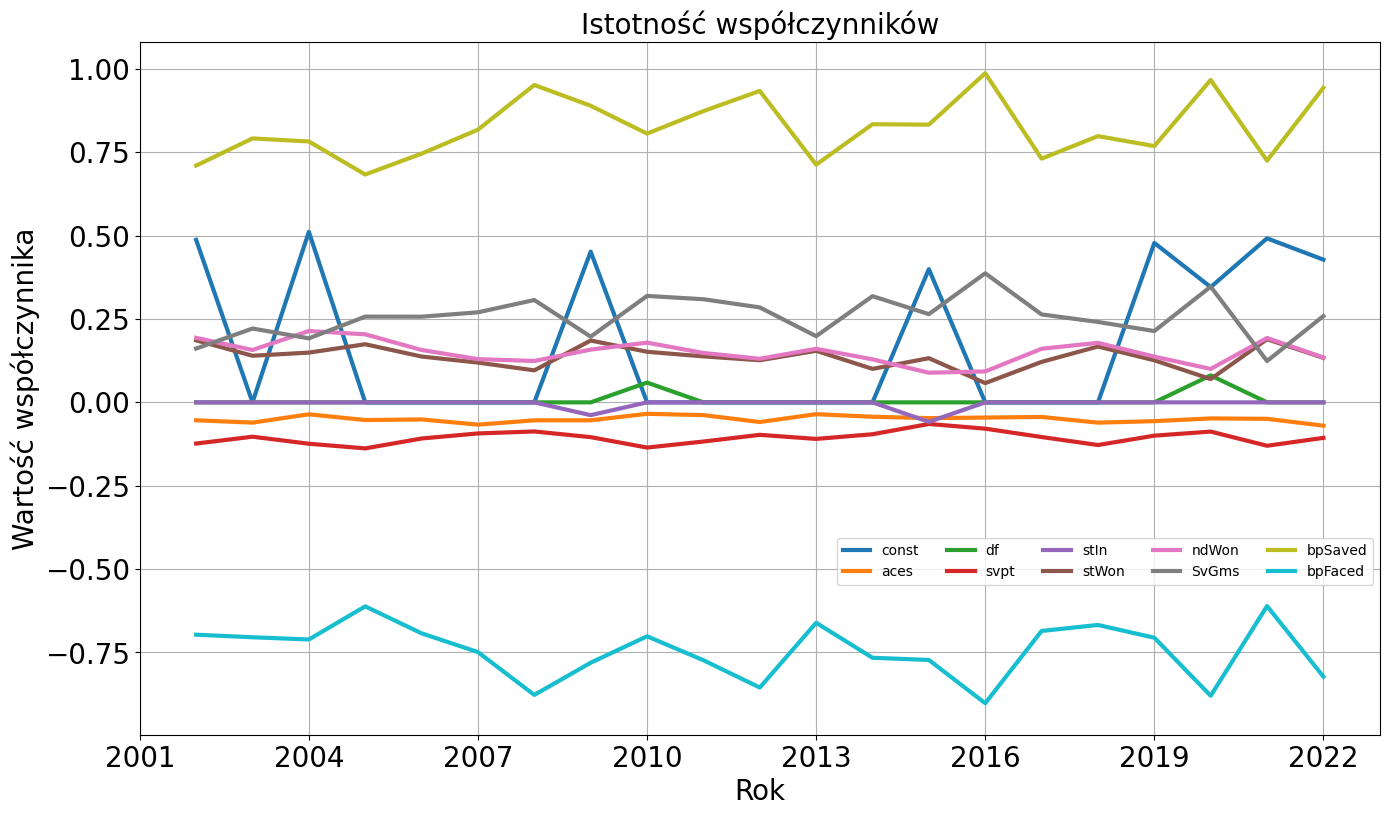

In [ ]:
param_names = col_names_pom
plt.figure(figsize=(16, 9))
for i in range(len(L)):
    plt.plot(np.linspace(2022, 2002, 21), L[i], label = str(col_names_pom[i]), linewidth = 3)
plt.xlabel("Rok", fontsize = 20)
plt.ylabel("Wartość współczynnika", fontsize = 20)
plt.title("Istotność współczynników", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(ncol = 5, bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.grid()
plt.savefig("WYKRES10.pdf")

In [ ]:
L = [[], [], [], [], [], [], [], [], [], [],]
p = 1
for j in range(2022, 2001, -1):
    l = 0
    l_pom = []
    for i in range(len(US_m.iloc[:,20])): #Hard
        if US_m.iloc[i, 0][:4] == str(j):
            l += 1
            l_pom.append(i)
    print(j)
    pom_df = dataframe_m.iloc[lj_US_m[j-2023],]
    y_pom = list(dataframe_m.iloc[lj_US_m[j-2023], 0])
    X_pom = pom_df[col_names]

    X_pom = sm.add_constant(X_pom)

    model_pom = sm.Logit(y_pom, X_pom)

    result_pom = model_pom.fit(disp=0)
    if j == 2022:
        print(result_pom.summary())
    maxi = 0
    for i in range(1, len(result_pom.pvalues)):
        if maxi < result_pom.pvalues[i]:
            maxi = result_pom.pvalues[i]
            J = i
    if maxi < 0.05:
        if result_pom.pvalues[0] >= 0.05:
            X_pom = X_pom.drop(columns=[X_pom.columns[0]])

            model_pom = sm.Logit(y_pom, X_pom)

            result_pom = model_pom.fit(disp=0)
    else:
        X_pom = X_pom.drop(columns=[X_pom.columns[J]])

        model_pom = sm.Logit(y_pom, X_pom)

        result_pom = model_pom.fit(disp=0)
        maxi = 0
        for i in range(1, len(result_pom.pvalues)):
            if maxi < result_pom.pvalues[i]:
                maxi = result_pom.pvalues[i]
                J = i
        if maxi < 0.05:
            if result_pom.pvalues[0] >= 0.05:
                X_pom = X_pom.drop(columns=[X_pom.columns[0]])

                model_pom = sm.Logit(y_pom, X_pom)

                result_pom = model_pom.fit(disp=0)
        else:
            X_pom = X_pom.drop(columns=[X_pom.columns[J]])

            model_pom = sm.Logit(y_pom, X_pom)

            result_pom = model_pom.fit(disp=0)
            maxi = 0
            for i in range(1, len(result_pom.pvalues)):
                if maxi < result_pom.pvalues[i]:
                    maxi = result_pom.pvalues[i]
                    J = i
            if result_pom.pvalues[0] >= 0.05:
                X_pom = X_pom.drop(columns=[X_pom.columns[0]])

                model_pom = sm.Logit(y_pom, X_pom)

                result_pom = model_pom.fit(disp=0)
    cols = result_pom.params.index.tolist()
    for i in range(len(L)-1, -1, -1):
        for k in range(len(cols)):
            if col_names_pom[i] == cols[k]:
                L[i].append(result_pom.params[k])
    for i in range(len(L)):
        if len(L[i]) != p:
            L[i].append(0)
    pop1 = US_m.iloc[l_pom, 27:36]
    pop1.columns = col_names
    pop2 = US_m.iloc[l_pom, 36:45]
    pop2.columns = col_names
    frames = [pop1, pop2]
    pop = pd.concat(frames)
    pop = sm.add_constant(pop)
    expo = []
    for i in range(len(l_pom)):
        expo.append(np.exp(L[0][p-1] + L[1][p-1] * US_m.iloc[l_pom[i], 27] + L[2][p-1] * US_m.iloc[l_pom[i], 28] + L[3][p-1] * US_m.iloc[l_pom[i], 29] + L[4][p-1] * US_m.iloc[l_pom[i], 30] + L[5][p-1] * US_m.iloc[l_pom[i], 31] + L[6][p-1] * US_m.iloc[l_pom[i], 32] + L[7][p-1] * US_m.iloc[l_pom[i], 33] + L[8][p-1] * US_m.iloc[l_pom[i], 34] + L[9][p-1] * US_m.iloc[l_pom[i], 35]))
        expo.append(np.exp(L[0][p-1] + L[1][p-1] * US_m.iloc[l_pom[i], 36] + L[2][p-1] * US_m.iloc[l_pom[i], 37] + L[3][p-1] * US_m.iloc[l_pom[i], 38] + L[4][p-1] * US_m.iloc[l_pom[i], 39] + L[5][p-1] * US_m.iloc[l_pom[i], 40] + L[6][p-1] * US_m.iloc[l_pom[i], 41] + L[7][p-1] * US_m.iloc[l_pom[i], 42] + L[8][p-1] * US_m.iloc[l_pom[i], 43] + L[9][p-1] * US_m.iloc[l_pom[i], 44]))
    f = []
    for i in range(len(expo)):
        f.append(expo[i]/(1 + expo[i]))
    foo, bar = zip(*sorted(zip(f, l * [1, 0])))
    index = [i for i in range(2 * len(l_pom))]
    ll = 0
    for i in range(int(len(index)/2)):
        if bar[i] == 1:
            ll += 1
    print("Skuteczność regresji: ", 1 - (ll/(len(index)/2)))
    p += 1
    if j == 2022:
        print(result_pom.summary())

2022
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 5492
Model:                          Logit   Df Residuals:                     5482
Method:                           MLE   Df Model:                            9
Date:                Sun, 14 Jan 2024   Pseudo R-squ.:                  0.3458
Time:                        00:42:39   Log-Likelihood:                -2490.5
converged:                       True   LL-Null:                       -3806.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5589      0.118      4.719      0.000       0.327       0.791
aces          -0.0737      0.009     -8.436      0.000      -0.091      -0.057
df             0.0126      0.018      0.703    

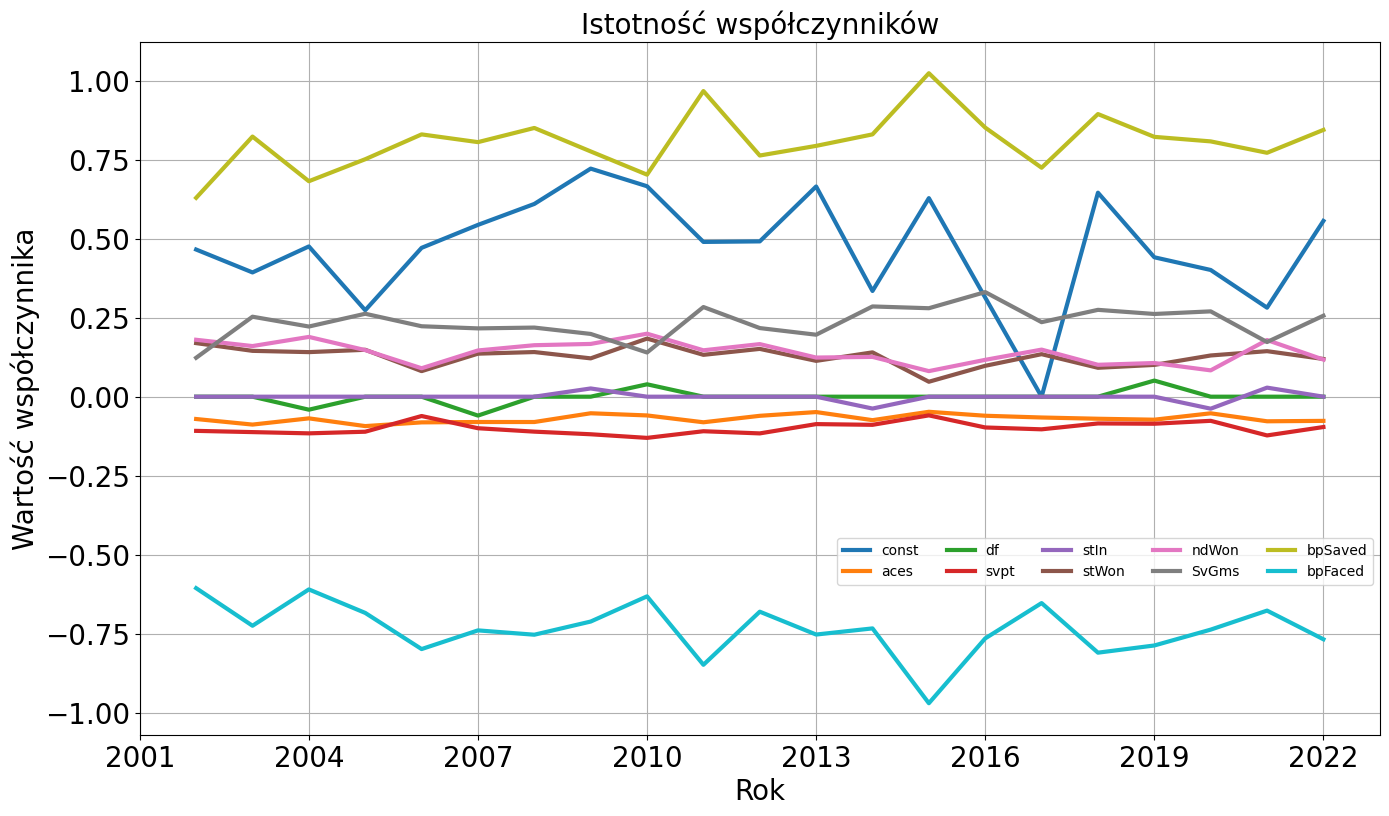

In [ ]:
param_names = col_names_pom
plt.figure(figsize=(16, 9))
for i in range(len(L)):
    plt.plot(np.linspace(2022, 2002, 21), L[i], label = str(col_names_pom[i]), linewidth = 3)
plt.xlabel("Rok", fontsize = 20)
plt.ylabel("Wartość współczynnika", fontsize = 20)
plt.title("Istotność współczynników", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(ncol = 5, bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.grid()
plt.savefig("WYKRES11.pdf")

In [ ]:
L = [[], [], [], [], [], [], [], [], [], [],]
p = 1
for j in range(2022, 2020, -1):
    l = 0
    l_pom = []
    for i in range(len(WB_m.iloc[:,20])): #Hard
        if WB_m.iloc[i, 0][:4] == str(j):
            l += 1
            l_pom.append(i)
    print(j)
    pom_df = dataframe_m.iloc[lj_WB_m[j-2024],]
    y_pom = list(dataframe_m.iloc[lj_WB_m[j-2024], 0])
    X_pom = pom_df[col_names]

    X_pom = sm.add_constant(X_pom)

    model_pom = sm.Logit(y_pom, X_pom)

    result_pom = model_pom.fit(disp=0)
    if j == 2022:
        print(result_pom.summary())
    maxi = 0
    for i in range(1, len(result_pom.pvalues)):
        if maxi < result_pom.pvalues[i]:
            maxi = result_pom.pvalues[i]
            J = i
    if maxi < 0.05:
        if result_pom.pvalues[0] >= 0.05:
            X_pom = X_pom.drop(columns=[X_pom.columns[0]])

            model_pom = sm.Logit(y_pom, X_pom)

            result_pom = model_pom.fit(disp=0)
    else:
        X_pom = X_pom.drop(columns=[X_pom.columns[J]])

        model_pom = sm.Logit(y_pom, X_pom)

        result_pom = model_pom.fit(disp=0)
        maxi = 0
        for i in range(1, len(result_pom.pvalues)):
            if maxi < result_pom.pvalues[i]:
                maxi = result_pom.pvalues[i]
                J = i
        if maxi < 0.05:
            if result_pom.pvalues[0] >= 0.05:
                X_pom = X_pom.drop(columns=[X_pom.columns[0]])

                model_pom = sm.Logit(y_pom, X_pom)

                result_pom = model_pom.fit(disp=0)
        else:
            X_pom = X_pom.drop(columns=[X_pom.columns[J]])

            model_pom = sm.Logit(y_pom, X_pom)

            result_pom = model_pom.fit(disp=0)
            maxi = 0
            for i in range(1, len(result_pom.pvalues)):
                if maxi < result_pom.pvalues[i]:
                    maxi = result_pom.pvalues[i]
                    J = i
            if result_pom.pvalues[0] >= 0.05:
                X_pom = X_pom.drop(columns=[X_pom.columns[0]])

                model_pom = sm.Logit(y_pom, X_pom)

                result_pom = model_pom.fit(disp=0)
    cols = result_pom.params.index.tolist()
    for i in range(len(L)-1, -1, -1):
        for k in range(len(cols)):
            if col_names_pom[i] == cols[k]:
                L[i].append(result_pom.params[k])
    for i in range(len(L)):
        if len(L[i]) != p:
            L[i].append(0)
    pop1 = WB_m.iloc[l_pom, 27:36]
    pop1.columns = col_names
    pop2 = WB_m.iloc[l_pom, 36:45]
    pop2.columns = col_names
    frames = [pop1, pop2]
    pop = pd.concat(frames)
    pop = sm.add_constant(pop)
    expo = []
    for i in range(len(l_pom)):
        expo.append(np.exp(L[0][p-1] + L[1][p-1] * WB_m.iloc[l_pom[i], 27] + L[2][p-1] * WB_m.iloc[l_pom[i], 28] + L[3][p-1] * WB_m.iloc[l_pom[i], 29] + L[4][p-1] * WB_m.iloc[l_pom[i], 30] + L[5][p-1] * WB_m.iloc[l_pom[i], 31] + L[6][p-1] * WB_m.iloc[l_pom[i], 32] + L[7][p-1] * WB_m.iloc[l_pom[i], 33] + L[8][p-1] * WB_m.iloc[l_pom[i], 34] + L[9][p-1] * WB_m.iloc[l_pom[i], 35]))
        expo.append(np.exp(L[0][p-1] + L[1][p-1] * WB_m.iloc[l_pom[i], 36] + L[2][p-1] * WB_m.iloc[l_pom[i], 37] + L[3][p-1] * WB_m.iloc[l_pom[i], 38] + L[4][p-1] * WB_m.iloc[l_pom[i], 39] + L[5][p-1] * WB_m.iloc[l_pom[i], 40] + L[6][p-1] * WB_m.iloc[l_pom[i], 41] + L[7][p-1] * WB_m.iloc[l_pom[i], 42] + L[8][p-1] * WB_m.iloc[l_pom[i], 43] + L[9][p-1] * WB_m.iloc[l_pom[i], 44]))
    f = []
    for i in range(len(expo)):
        f.append(expo[i]/(1 + expo[i]))
    foo, bar = zip(*sorted(zip(f, l * [1, 0])))
    index = [i for i in range(2 * len(l_pom))]
    ll = 0
    for i in range(int(len(index)/2)):
        if bar[i] == 1:
            ll += 1
    print("Skuteczność regresji: ", 1 - (ll/(len(index)/2)))
    p += 1
    if j == 2022:
        print(result_pom.summary())

2022
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 5470
Model:                          Logit   Df Residuals:                     5460
Method:                           MLE   Df Model:                            9
Date:                Sun, 14 Jan 2024   Pseudo R-squ.:                  0.3470
Time:                        00:42:43   Log-Likelihood:                -2475.7
converged:                       True   LL-Null:                       -3791.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4932      0.119      4.136      0.000       0.259       0.727
aces          -0.0715      0.009     -8.200      0.000      -0.089      -0.054
df             0.0243      0.018      1.343    

In [ ]:
for i in range(10):
    L[i].append(0)

In [ ]:
for j in range(2019, 2001, -1):
    l = 0
    l_pom = []
    for i in range(len(WB_m.iloc[:,20])): #Hard
        if WB_m.iloc[i, 0][:4] == str(j):
            l += 1
            l_pom.append(i)
    print(j)
    pom_df = dataframe_m.iloc[lj_WB_m[j-2023],]
    y_pom = list(dataframe_m.iloc[lj_WB_m[j-2023], 0])
    X_pom = pom_df[col_names]

    X_pom = sm.add_constant(X_pom)

    model_pom = sm.Logit(y_pom, X_pom)

    result_pom = model_pom.fit(disp=0)
    maxi = 0
    for i in range(1, len(result_pom.pvalues)):
        if maxi < result_pom.pvalues[i]:
            maxi = result_pom.pvalues[i]
            J = i
    if maxi < 0.05:
        if result_pom.pvalues[0] >= 0.05:
            X_pom = X_pom.drop(columns=[X_pom.columns[0]])

            model_pom = sm.Logit(y_pom, X_pom)

            result_pom = model_pom.fit(disp=0)
    else:
        X_pom = X_pom.drop(columns=[X_pom.columns[J]])

        model_pom = sm.Logit(y_pom, X_pom)

        result_pom = model_pom.fit(disp=0)
        maxi = 0
        for i in range(1, len(result_pom.pvalues)):
            if maxi < result_pom.pvalues[i]:
                maxi = result_pom.pvalues[i]
                J = i
        if maxi < 0.05:
            if result_pom.pvalues[0] >= 0.05:
                X_pom = X_pom.drop(columns=[X_pom.columns[0]])

                model_pom = sm.Logit(y_pom, X_pom)

                result_pom = model_pom.fit(disp=0)
        else:
            X_pom = X_pom.drop(columns=[X_pom.columns[J]])

            model_pom = sm.Logit(y_pom, X_pom)

            result_pom = model_pom.fit(disp=0)
            maxi = 0
            for i in range(1, len(result_pom.pvalues)):
                if maxi < result_pom.pvalues[i]:
                    maxi = result_pom.pvalues[i]
                    J = i
            if result_pom.pvalues[0] >= 0.05:
                X_pom = X_pom.drop(columns=[X_pom.columns[0]])

                model_pom = sm.Logit(y_pom, X_pom)

                result_pom = model_pom.fit(disp=0)
    cols = result_pom.params.index.tolist()
    p += 1
    for i in range(len(L)-1, -1, -1):
        for k in range(len(cols)):
            if col_names_pom[i] == cols[k]:
                L[i].append(result_pom.params[k])
    for i in range(len(L)):
        if len(L[i]) != p:
            L[i].append(0)
    pop1 = WB_m.iloc[l_pom, 27:36]
    pop1.columns = col_names
    pop2 = WB_m.iloc[l_pom, 36:45]
    pop2.columns = col_names
    frames = [pop1, pop2]
    pop = pd.concat(frames)
    pop = sm.add_constant(pop)
    expo = []
    for i in range(len(l_pom)):
        expo.append(np.exp(L[0][p-1] + L[1][p-1] * WB_m.iloc[l_pom[i], 27] + L[2][p-1] * WB_m.iloc[l_pom[i], 28] + L[3][p-1] * WB_m.iloc[l_pom[i], 29] + L[4][p-1] * WB_m.iloc[l_pom[i], 30] + L[5][p-1] * WB_m.iloc[l_pom[i], 31] + L[6][p-1] * WB_m.iloc[l_pom[i], 32] + L[7][p-1] * WB_m.iloc[l_pom[i], 33] + L[8][p-1] * WB_m.iloc[l_pom[i], 34] + L[9][p-1] * WB_m.iloc[l_pom[i], 35]))
        expo.append(np.exp(L[0][p-1] + L[1][p-1] * WB_m.iloc[l_pom[i], 36] + L[2][p-1] * WB_m.iloc[l_pom[i], 37] + L[3][p-1] * WB_m.iloc[l_pom[i], 38] + L[4][p-1] * WB_m.iloc[l_pom[i], 39] + L[5][p-1] * WB_m.iloc[l_pom[i], 40] + L[6][p-1] * WB_m.iloc[l_pom[i], 41] + L[7][p-1] * WB_m.iloc[l_pom[i], 42] + L[8][p-1] * WB_m.iloc[l_pom[i], 43] + L[9][p-1] * WB_m.iloc[l_pom[i], 44]))
    f = []
    for i in range(len(expo)):
        f.append(expo[i]/(1 + expo[i]))
    foo, bar = zip(*sorted(zip(f, l * [1, 0])))
    index = [i for i in range(2 * len(l_pom))]
    ll = 0
    for i in range(int(len(index)/2)):
        if bar[i] == 1:
            ll += 1
    print("Skuteczność regresji: ", 1 - (ll/(len(index)/2)))

2019
Skuteczność regresji:  0.8387096774193549
2018
Skuteczność regresji:  0.8
2017
Skuteczność regresji:  0.829059829059829
2016
Skuteczność regresji:  0.8225806451612903
2015
Skuteczność regresji:  0.814516129032258
2014
Skuteczność regresji:  0.7698412698412699
2013
Skuteczność regresji:  0.8717948717948718
2012
Skuteczność regresji:  0.7950819672131147
2011
Skuteczność regresji:  0.8524590163934427
2010
Skuteczność regresji:  0.8264462809917356
2009
Skuteczność regresji:  0.8166666666666667
2008
Skuteczność regresji:  0.829059829059829
2007
Skuteczność regresji:  0.8455284552845528
2006
Skuteczność regresji:  0.8306451612903226
2005
Skuteczność regresji:  0.8292682926829268
2004
Skuteczność regresji:  0.8174603174603174
2003
Skuteczność regresji:  0.7479674796747968
2002
Skuteczność regresji:  0.814516129032258


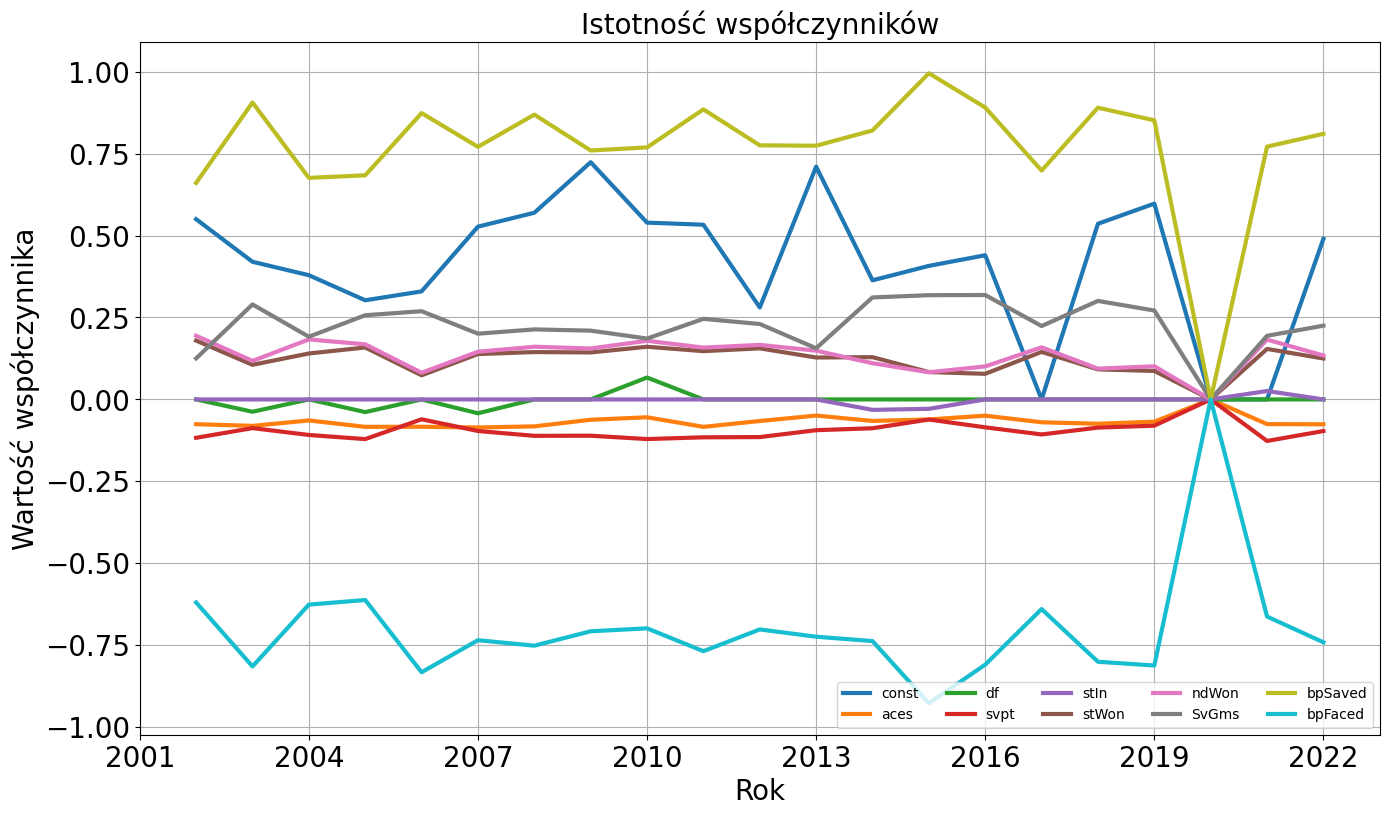

In [ ]:
param_names = col_names_pom
plt.figure(figsize=(16, 9))
for i in range(len(L)):
    plt.plot(np.linspace(2022, 2002, 21), L[i], label = str(col_names_pom[i]), linewidth = 3)
plt.xlabel("Rok", fontsize = 20)
plt.ylabel("Wartość współczynnika", fontsize = 20)
plt.title("Istotność współczynników", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(ncol = 5, loc = "lower right")
plt.grid()
plt.savefig("WYKRES12.pdf")

In [ ]:
L = [[], [], [], [], [], [], [], [], [], [],]
p = 1
for j in range(2022, 2001, -1):
    l = 0
    l_pom = []
    for i in range(len(RG_m.iloc[:,20])): #Hard
        if RG_m.iloc[i, 0][:4] == str(j):
            l += 1
            l_pom.append(i)
    print(j)
    pom_df = dataframe_m.iloc[lj_RG_m[j-2024],]
    y_pom = list(dataframe_m.iloc[lj_RG_m[j-2024], 0])
    X_pom = pom_df[col_names]

    X_pom = sm.add_constant(X_pom)

    model_pom = sm.Logit(y_pom, X_pom)

    result_pom = model_pom.fit(disp=0)
    if j == 2022:
        print(result_pom.summary())
    maxi = 0
    for i in range(1, len(result_pom.pvalues)):
        if maxi < result_pom.pvalues[i]:
            maxi = result_pom.pvalues[i]
            J = i
    if maxi < 0.05:
        if result_pom.pvalues[0] >= 0.05:
            X_pom = X_pom.drop(columns=[X_pom.columns[0]])

            model_pom = sm.Logit(y_pom, X_pom)

            result_pom = model_pom.fit(disp=0)
    else:
        X_pom = X_pom.drop(columns=[X_pom.columns[J]])

        model_pom = sm.Logit(y_pom, X_pom)

        result_pom = model_pom.fit(disp=0)
        maxi = 0
        for i in range(1, len(result_pom.pvalues)):
            if maxi < result_pom.pvalues[i]:
                maxi = result_pom.pvalues[i]
                J = i
        if maxi < 0.05:
            if result_pom.pvalues[0] >= 0.05:
                X_pom = X_pom.drop(columns=[X_pom.columns[0]])

                model_pom = sm.Logit(y_pom, X_pom)

                result_pom = model_pom.fit(disp=0)
        else:
            X_pom = X_pom.drop(columns=[X_pom.columns[J]])

            model_pom = sm.Logit(y_pom, X_pom)

            result_pom = model_pom.fit(disp=0)
            maxi = 0
            for i in range(1, len(result_pom.pvalues)):
                if maxi < result_pom.pvalues[i]:
                    maxi = result_pom.pvalues[i]
                    J = i
            if result_pom.pvalues[0] >= 0.05:
                X_pom = X_pom.drop(columns=[X_pom.columns[0]])

                model_pom = sm.Logit(y_pom, X_pom)

                result_pom = model_pom.fit(disp=0)
    cols = result_pom.params.index.tolist()
    for i in range(len(L)-1, -1, -1):
        for k in range(len(cols)):
            if col_names_pom[i] == cols[k]:
                L[i].append(result_pom.params[k])
    for i in range(len(L)):
        if len(L[i]) != p:
            L[i].append(0)
    pop1 = RG_m.iloc[l_pom, 27:36]
    pop1.columns = col_names
    pop2 = RG_m.iloc[l_pom, 36:45]
    pop2.columns = col_names
    frames = [pop1, pop2]
    pop = pd.concat(frames)
    pop = sm.add_constant(pop)
    expo = []
    for i in range(len(l_pom)):
        expo.append(np.exp(L[0][p-1] + L[1][p-1] * RG_m.iloc[l_pom[i], 27] + L[2][p-1] * RG_m.iloc[l_pom[i], 28] + L[3][p-1] * RG_m.iloc[l_pom[i], 29] + L[4][p-1] * RG_m.iloc[l_pom[i], 30] + L[5][p-1] * RG_m.iloc[l_pom[i], 31] + L[6][p-1] * RG_m.iloc[l_pom[i], 32] + L[7][p-1] * RG_m.iloc[l_pom[i], 33] + L[8][p-1] * RG_m.iloc[l_pom[i], 34] + L[9][p-1] * RG_m.iloc[l_pom[i], 35]))
        expo.append(np.exp(L[0][p-1] + L[1][p-1] * RG_m.iloc[l_pom[i], 36] + L[2][p-1] * RG_m.iloc[l_pom[i], 37] + L[3][p-1] * RG_m.iloc[l_pom[i], 38] + L[4][p-1] * RG_m.iloc[l_pom[i], 39] + L[5][p-1] * RG_m.iloc[l_pom[i], 40] + L[6][p-1] * RG_m.iloc[l_pom[i], 41] + L[7][p-1] * RG_m.iloc[l_pom[i], 42] + L[8][p-1] * RG_m.iloc[l_pom[i], 43] + L[9][p-1] * RG_m.iloc[l_pom[i], 44]))
    f = []
    for i in range(len(expo)):
        f.append(expo[i]/(1 + expo[i]))
    foo, bar = zip(*sorted(zip(f, l * [1, 0])))
    index = [i for i in range(2 * len(l_pom))]
    ll = 0
    for i in range(int(len(index)/2)):
        if bar[i] == 1:
            ll += 1
    print("Skuteczność regresji: ", 1 - (ll/(len(index)/2)))
    p += 1
    if j == 2022:
        print(result_pom.summary())

2022
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1694
Model:                          Logit   Df Residuals:                     1684
Method:                           MLE   Df Model:                            9
Date:                Sun, 14 Jan 2024   Pseudo R-squ.:                  0.3759
Time:                        00:42:48   Log-Likelihood:                -732.85
converged:                       True   LL-Null:                       -1174.2
Covariance Type:            nonrobust   LLR p-value:                3.339e-184
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5920      0.237      2.499      0.012       0.128       1.056
aces          -0.0866      0.020     -4.247      0.000      -0.127      -0.047
df             0.0705      0.036      1.966    

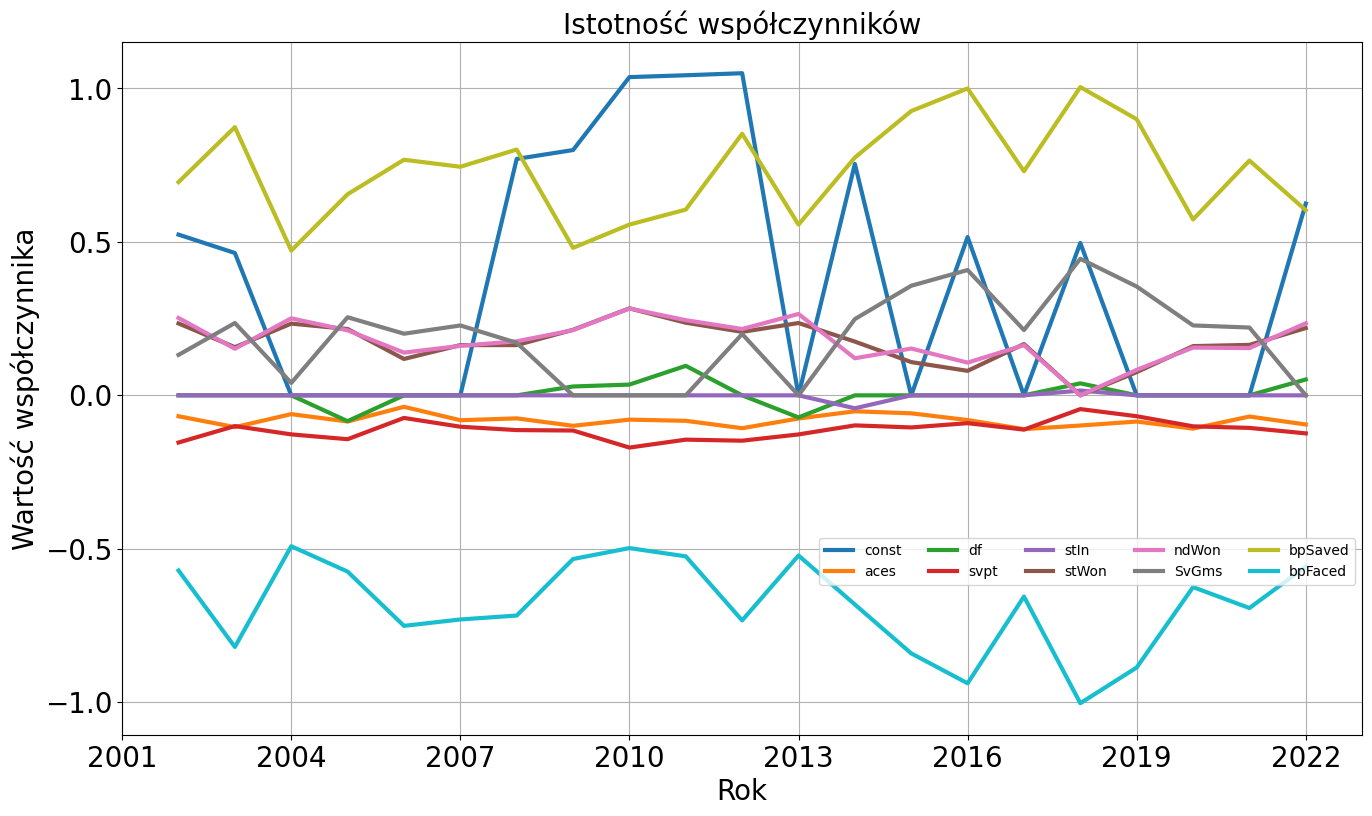

In [ ]:
param_names = col_names_pom
plt.figure(figsize=(16, 9))
for i in range(len(L)):
    plt.plot(np.linspace(2022, 2002, 21), L[i], label = str(col_names_pom[i]), linewidth = 3)
plt.xlabel("Rok", fontsize = 20)
plt.ylabel("Wartość współczynnika", fontsize = 20)
plt.title("Istotność współczynników", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(ncol = 5, bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.grid()
plt.savefig("WYKRES13.pdf")

In [ ]:
L = [[], [], [], [], [], [], [], [], [], [],]
p = 1
for j in range(2022, 2015, -1):
    l = 0
    l_pom = []
    for i in range(len(AU_w.iloc[:,20])): #Hard
        if AU_w.iloc[i, 0][:4] == str(j):
            l += 1
            l_pom.append(i)
    print(j)
    pom_df = dataframe_w.iloc[lj_AU_w[j-2024],]
    y_pom = list(dataframe_w.iloc[lj_AU_w[j-2024], 0])
    X_pom = pom_df[col_names]

    X_pom = sm.add_constant(X_pom)

    model_pom = sm.Logit(y_pom, X_pom)

    result_pom = model_pom.fit(disp=0)
    maxi = 0
    if j == 2022:
        print(result_pom.summary())
    for i in range(1, len(result_pom.pvalues)):
        if maxi < result_pom.pvalues[i]:
            maxi = result_pom.pvalues[i]
            J = i
    if maxi < 0.05:
        if result_pom.pvalues[0] >= 0.05:
            X_pom = X_pom.drop(columns=[X_pom.columns[0]])

            model_pom = sm.Logit(y_pom, X_pom)

            result_pom = model_pom.fit(disp=0)
    else:
        X_pom = X_pom.drop(columns=[X_pom.columns[J]])

        model_pom = sm.Logit(y_pom, X_pom)

        result_pom = model_pom.fit(disp=0)
        maxi = 0
        for i in range(1, len(result_pom.pvalues)):
            if maxi < result_pom.pvalues[i]:
                maxi = result_pom.pvalues[i]
                J = i
        if maxi < 0.05:
            if result_pom.pvalues[0] >= 0.05:
                X_pom = X_pom.drop(columns=[X_pom.columns[0]])

                model_pom = sm.Logit(y_pom, X_pom)

                result_pom = model_pom.fit(disp=0)
                maxi = 0
                for i in range(1, len(result_pom.pvalues)):
                    if maxi < result_pom.pvalues[i]:
                        maxi = result_pom.pvalues[i]
                        J = i
                if maxi >= 0.05:
                    X_pom = X_pom.drop(columns=[X_pom.columns[J]])

                    model_pom = sm.Logit(y_pom, X_pom)

                    result_pom = model_pom.fit(disp=0)
        else:
            X_pom = X_pom.drop(columns=[X_pom.columns[J]])

            model_pom = sm.Logit(y_pom, X_pom)

            result_pom = model_pom.fit(disp=0)
            maxi = 0
            for i in range(1, len(result_pom.pvalues)):
                if maxi < result_pom.pvalues[i]:
                    maxi = result_pom.pvalues[i]
                    J = i
            if result_pom.pvalues[0] >= 0.05:
                X_pom = X_pom.drop(columns=[X_pom.columns[0]])

                model_pom = sm.Logit(y_pom, X_pom)

                result_pom = model_pom.fit(disp=0)
    #print(result_pom.summary())
    cols = result_pom.params.index.tolist()
    for i in range(len(L)-1, -1, -1):
        for k in range(len(cols)):
            if col_names_pom[i] == cols[k]:
                L[i].append(result_pom.params[k])
    for i in range(len(L)):
        if len(L[i]) != p:
            L[i].append(0)
    pop1 = AU_w.iloc[l_pom, 27:36]
    pop1.columns = col_names
    pop2 = AU_w.iloc[l_pom, 36:45]
    pop2.columns = col_names
    frames = [pop1, pop2]
    pop = pd.concat(frames)
    pop = sm.add_constant(pop)
    expo = []
    for i in range(len(l_pom)):
        expo.append(np.exp(L[0][p-1] + L[1][p-1] * AU_w.iloc[l_pom[i], 27] + L[2][p-1] * AU_w.iloc[l_pom[i], 28] + L[3][p-1] * AU_w.iloc[l_pom[i], 29] + L[4][p-1] * AU_w.iloc[l_pom[i], 30] + L[5][p-1] * AU_w.iloc[l_pom[i], 31] + L[6][p-1] * AU_w.iloc[l_pom[i], 32] + L[7][p-1] * AU_w.iloc[l_pom[i], 33] + L[8][p-1] * AU_w.iloc[l_pom[i], 34] + L[9][p-1] * AU_w.iloc[l_pom[i], 35]))
        expo.append(np.exp(L[0][p-1] + L[1][p-1] * AU_w.iloc[l_pom[i], 36] + L[2][p-1] * AU_w.iloc[l_pom[i], 37] + L[3][p-1] * AU_w.iloc[l_pom[i], 38] + L[4][p-1] * AU_w.iloc[l_pom[i], 39] + L[5][p-1] * AU_w.iloc[l_pom[i], 40] + L[6][p-1] * AU_w.iloc[l_pom[i], 41] + L[7][p-1] * AU_w.iloc[l_pom[i], 42] + L[8][p-1] * AU_w.iloc[l_pom[i], 43] + L[9][p-1] * AU_w.iloc[l_pom[i], 44]))
    f = []
    for i in range(len(expo)):
        f.append(expo[i]/(1 + expo[i]))
    foo, bar = zip(*sorted(zip(f, l * [1, 0])))
    index = [i for i in range(2 * len(l_pom))]
    ll = 0
    for i in range(int(len(index)/2)):
        if bar[i] == 1:
            ll += 1
    print("Skuteczność regresji: ", 1 - (ll/(len(index)/2)))
    p += 1
    if j == 2022:
        print(result_pom.summary())

2022
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3034
Model:                          Logit   Df Residuals:                     3024
Method:                           MLE   Df Model:                            9
Date:                Sun, 14 Jan 2024   Pseudo R-squ.:                  0.3671
Time:                        00:42:53   Log-Likelihood:                -1330.9
converged:                      False   LL-Null:                       -2103.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3537      0.201      1.756      0.079      -0.041       0.748
aces          -0.0615      0.021     -2.963      0.003      -0.102      -0.021
df             0.0401      0.022      1.806    

C:\Users\patry\AppData\Local\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\patry\AppData\Local\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Skuteczność regresji:  0.8333333333333334
2020
Skuteczność regresji:  0.8346456692913385
2019
Skuteczność regresji:  0.888
2018
Skuteczność regresji:  0.8188976377952756
2017
Skuteczność regresji:  0.8536585365853658
2016
Skuteczność regresji:  0.8253968253968254


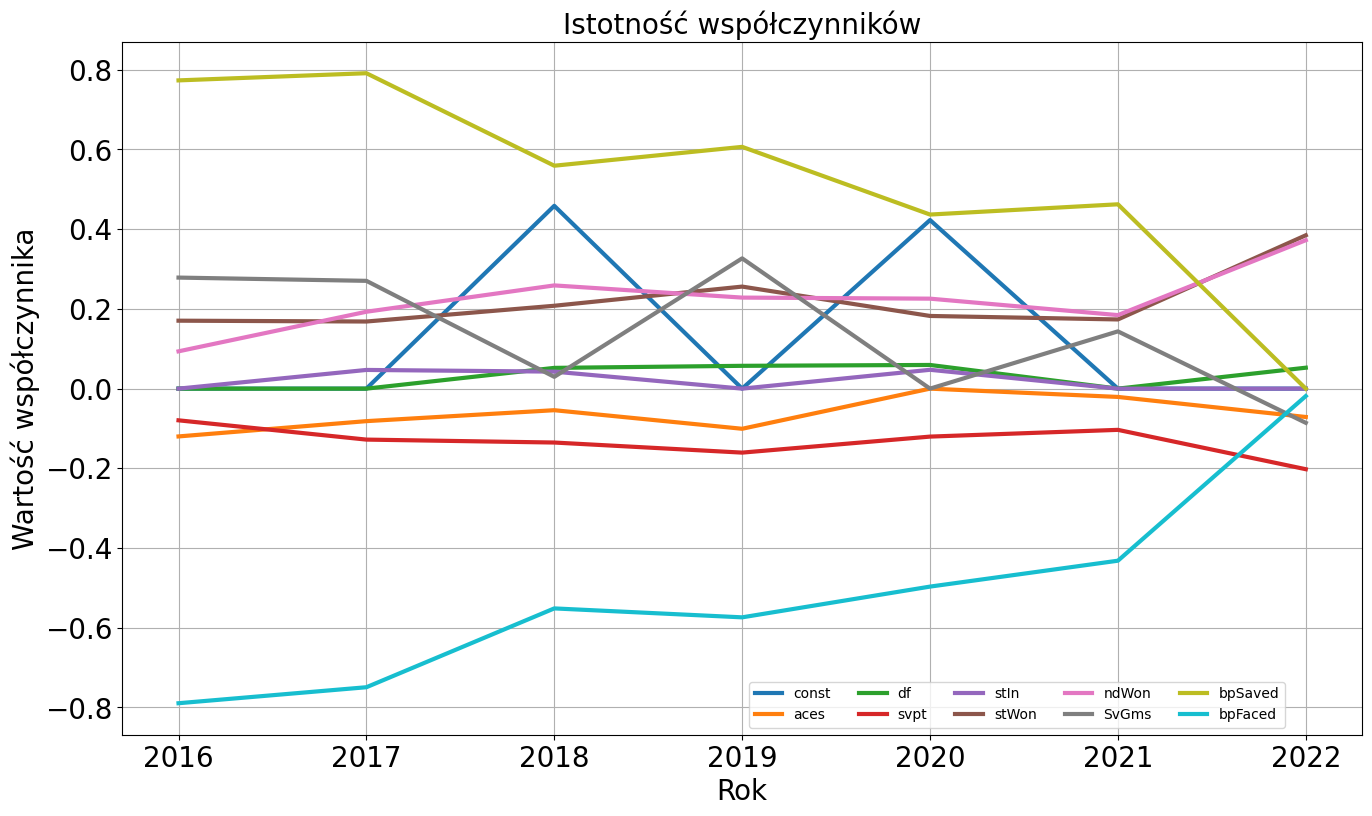

In [ ]:
param_names = col_names_pom
plt.figure(figsize=(16, 9))
for i in range(len(L)):
    plt.plot(np.linspace(2022, 2016, 7), L[i], label = str(col_names_pom[i]), linewidth = 3)
plt.xlabel("Rok", fontsize = 20)
plt.ylabel("Wartość współczynnika", fontsize = 20)
plt.title("Istotność współczynników", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(ncol = 5, bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.grid()
plt.savefig("WYKRES10_w.pdf")

In [ ]:
L = [[], [], [], [], [], [], [], [], [], [],]
p = 1
for j in range(2022, 2015, -1):
    l = 0
    l_pom = []
    for i in range(len(US_w.iloc[:,20])): #Hard
        if US_w.iloc[i, 0][:4] == str(j):
            l += 1
            l_pom.append(i)
    print(j)
    pom_df = dataframe_w.iloc[lj_US_w[j-2023],]
    y_pom = list(dataframe_w.iloc[lj_US_w[j-2023], 0])
    X_pom = pom_df[col_names]

    X_pom = sm.add_constant(X_pom)

    model_pom = sm.Logit(y_pom, X_pom)

    result_pom = model_pom.fit(disp=0)
    maxi = 0
    if j == 2022:
        print(result_pom.summary())
    for i in range(1, len(result_pom.pvalues)):
        if maxi < result_pom.pvalues[i]:
            maxi = result_pom.pvalues[i]
            J = i
    if maxi < 0.05:
        if result_pom.pvalues[0] >= 0.05:
            X_pom = X_pom.drop(columns=[X_pom.columns[0]])

            model_pom = sm.Logit(y_pom, X_pom)

            result_pom = model_pom.fit(disp=0)
            maxi = 0
            for i in range(1, len(result_pom.pvalues)):
                if maxi < result_pom.pvalues[i]:
                    maxi = result_pom.pvalues[i]
                    J = i
            if maxi >= 0.05:
                X_pom = X_pom.drop(columns=[X_pom.columns[J]])

                model_pom = sm.Logit(y_pom, X_pom)

                result_pom = model_pom.fit(disp=0)
                maxi = 0
                for i in range(1, len(result_pom.pvalues)):
                    if maxi < result_pom.pvalues[i]:
                        maxi = result_pom.pvalues[i]
                        J = i
                if maxi >= 0.05:
                    X_pom = X_pom.drop(columns=[X_pom.columns[J]])

                    model_pom = sm.Logit(y_pom, X_pom)

                    result_pom = model_pom.fit(disp=0)
    else:
        X_pom = X_pom.drop(columns=[X_pom.columns[J]])

        model_pom = sm.Logit(y_pom, X_pom)

        result_pom = model_pom.fit(disp=0)
        maxi = 0
        for i in range(1, len(result_pom.pvalues)):
            if maxi < result_pom.pvalues[i]:
                maxi = result_pom.pvalues[i]
                J = i
        if maxi < 0.05:
            if result_pom.pvalues[0] >= 0.05:
                X_pom = X_pom.drop(columns=[X_pom.columns[0]])

                model_pom = sm.Logit(y_pom, X_pom)

                result_pom = model_pom.fit(disp=0)
                maxi = 0
                for i in range(1, len(result_pom.pvalues)):
                    if maxi < result_pom.pvalues[i]:
                        maxi = result_pom.pvalues[i]
                        J = i
                if maxi >= 0.05:
                    X_pom = X_pom.drop(columns=[X_pom.columns[J]])

                    model_pom = sm.Logit(y_pom, X_pom)

                    result_pom = model_pom.fit(disp=0)

        else:
            X_pom = X_pom.drop(columns=[X_pom.columns[J]])

            model_pom = sm.Logit(y_pom, X_pom)

            result_pom = model_pom.fit(disp=0)
            maxi = 0
            for i in range(1, len(result_pom.pvalues)):
                if maxi < result_pom.pvalues[i]:
                    maxi = result_pom.pvalues[i]
                    J = i
            if result_pom.pvalues[0] >= 0.05:
                X_pom = X_pom.drop(columns=[X_pom.columns[0]])

                model_pom = sm.Logit(y_pom, X_pom)

                result_pom = model_pom.fit(disp=0)
            else:
                X_pom = X_pom.drop(columns=[X_pom.columns[J]])

                model_pom = sm.Logit(y_pom, X_pom)

                result_pom = model_pom.fit(disp=0)
                maxi = 0
                for i in range(1, len(result_pom.pvalues)):
                    if maxi < result_pom.pvalues[i]:
                        maxi = result_pom.pvalues[i]
                        J = i
                if result_pom.pvalues[0] >= 0.05:
                    X_pom = X_pom.drop(columns=[X_pom.columns[0]])

                    model_pom = sm.Logit(y_pom, X_pom)

                    result_pom = model_pom.fit(disp=0)

    #print(result_pom.summary())
    cols = result_pom.params.index.tolist()
    for i in range(len(L)-1, -1, -1):
        for k in range(len(cols)):
            if col_names_pom[i] == cols[k]:
                L[i].append(result_pom.params[k])
    for i in range(len(L)):
        if len(L[i]) != p:
            L[i].append(0)
    pop1 = US_w.iloc[l_pom, 27:36]
    pop1.columns = col_names
    pop2 = US_w.iloc[l_pom, 36:45]
    pop2.columns = col_names
    frames = [pop1, pop2]
    pop = pd.concat(frames)
    pop = sm.add_constant(pop)
    expo = []
    for i in range(len(l_pom)):
        expo.append(np.exp(L[0][p-1] + L[1][p-1] * US_w.iloc[l_pom[i], 27] + L[2][p-1] * US_w.iloc[l_pom[i], 28] + L[3][p-1] * US_w.iloc[l_pom[i], 29] + L[4][p-1] * US_w.iloc[l_pom[i], 30] + L[5][p-1] * US_w.iloc[l_pom[i], 31] + L[6][p-1] * US_w.iloc[l_pom[i], 32] + L[7][p-1] * US_w.iloc[l_pom[i], 33] + L[8][p-1] * US_w.iloc[l_pom[i], 34] + L[9][p-1] * US_w.iloc[l_pom[i], 35]))
        expo.append(np.exp(L[0][p-1] + L[1][p-1] * US_w.iloc[l_pom[i], 36] + L[2][p-1] * US_w.iloc[l_pom[i], 37] + L[3][p-1] * US_w.iloc[l_pom[i], 38] + L[4][p-1] * US_w.iloc[l_pom[i], 39] + L[5][p-1] * US_w.iloc[l_pom[i], 40] + L[6][p-1] * US_w.iloc[l_pom[i], 41] + L[7][p-1] * US_w.iloc[l_pom[i], 42] + L[8][p-1] * US_w.iloc[l_pom[i], 43] + L[9][p-1] * US_w.iloc[l_pom[i], 44]))
    f = []
    for i in range(len(expo)):
        f.append(expo[i]/(1 + expo[i]))
    foo, bar = zip(*sorted(zip(f, l * [1, 0])))
    index = [i for i in range(2 * len(l_pom))]
    ll = 0
    for i in range(int(len(index)/2)):
        if bar[i] == 1:
            ll += 1
    print("Skuteczność regresji: ", 1 - (ll/(len(index)/2)))
    p += 1
    if j == 2022:
        print(result_pom.summary())

2022
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4956
Model:                          Logit   Df Residuals:                     4946
Method:                           MLE   Df Model:                            9
Date:                Sun, 14 Jan 2024   Pseudo R-squ.:                  0.4028
Time:                        00:42:54   Log-Likelihood:                -2051.6
converged:                      False   LL-Null:                       -3435.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6162      0.163      3.775      0.000       0.296       0.936
aces          -0.0883      0.017     -5.144      0.000      -0.122      -0.055
df             0.0808      0.018      4.480    

C:\Users\patry\AppData\Local\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Skuteczność regresji:  0.8253968253968254
2020
Skuteczność regresji:  0.8015873015873016
2019
Skuteczność regresji:  0.784
2018
Skuteczność regresji:  0.8253968253968254
2017
Skuteczność regresji:  0.8110236220472441
2016
Skuteczność regresji:  0.832


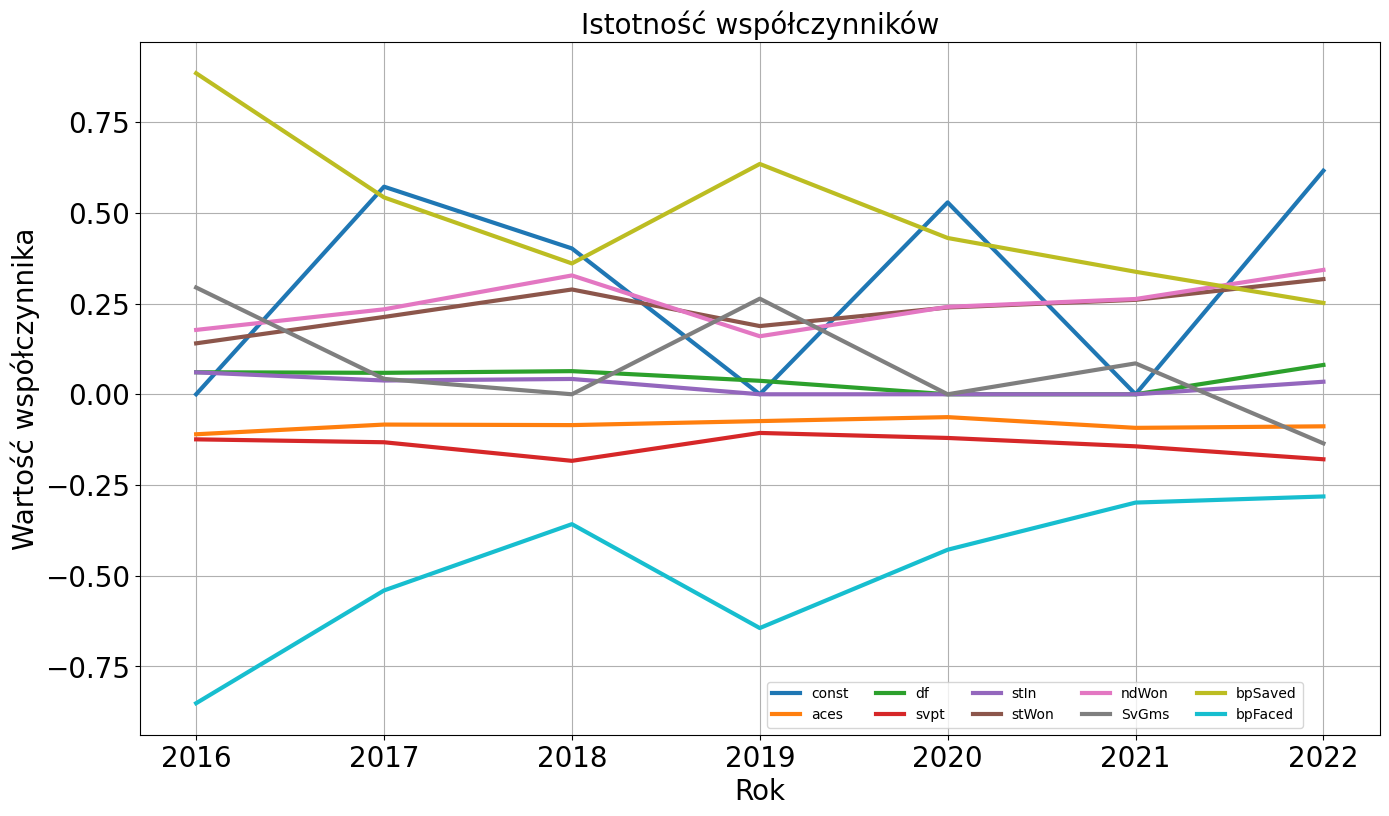

In [ ]:
param_names = col_names_pom
plt.figure(figsize=(16, 9))
for i in range(len(L)):
    plt.plot(np.linspace(2022, 2016, 7), L[i], label = str(col_names_pom[i]), linewidth = 3)
plt.xlabel("Rok", fontsize = 20)
plt.ylabel("Wartość współczynnika", fontsize = 20)
plt.title("Istotność współczynników", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(ncol = 5, bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.grid()
plt.savefig("WYKRES11_w.pdf")

In [ ]:
L = [[], [], [], [], [], [], [], [], [], [],]
p = 1
for j in range(2022, 2020, -1):
    l = 0
    l_pom = []
    for i in range(len(WB_w.iloc[:,20])): #Hard
        if WB_w.iloc[i, 0][:4] == str(j):
            l += 1
            l_pom.append(i)
    print(j)
    pom_df = dataframe_w.iloc[lj_WB_w[j-2024],]
    y_pom = list(dataframe_w.iloc[lj_WB_w[j-2024], 0])
    X_pom = pom_df[col_names]

    X_pom = sm.add_constant(X_pom)

    model_pom = sm.Logit(y_pom, X_pom)

    result_pom = model_pom.fit(disp=0)
    if j == 2022:
        print(result_pom.summary())
    maxi = 0
    for i in range(1, len(result_pom.pvalues)):
        if maxi < result_pom.pvalues[i]:
            maxi = result_pom.pvalues[i]
            J = i
    if maxi < 0.05:
        if result_pom.pvalues[0] >= 0.05:
            X_pom = X_pom.drop(columns=[X_pom.columns[0]])

            model_pom = sm.Logit(y_pom, X_pom)

            result_pom = model_pom.fit(disp=0)
            maxi = 0
            for i in range(1, len(result_pom.pvalues)):
                if maxi < result_pom.pvalues[i]:
                    maxi = result_pom.pvalues[i]
                    J = i
            if maxi >= 0.05:
                X_pom = X_pom.drop(columns=[X_pom.columns[J]])

                model_pom = sm.Logit(y_pom, X_pom)

                result_pom = model_pom.fit(disp=0)
                maxi = 0
                for i in range(1, len(result_pom.pvalues)):
                    if maxi < result_pom.pvalues[i]:
                        maxi = result_pom.pvalues[i]
                        J = i
                if maxi >= 0.05:
                    X_pom = X_pom.drop(columns=[X_pom.columns[J]])

                    model_pom = sm.Logit(y_pom, X_pom)

                    result_pom = model_pom.fit(disp=0)
    else:
        X_pom = X_pom.drop(columns=[X_pom.columns[J]])

        model_pom = sm.Logit(y_pom, X_pom)

        result_pom = model_pom.fit(disp=0)
        maxi = 0
        for i in range(1, len(result_pom.pvalues)):
            if maxi < result_pom.pvalues[i]:
                maxi = result_pom.pvalues[i]
                J = i
        if maxi < 0.05:
            if result_pom.pvalues[0] >= 0.05:
                X_pom = X_pom.drop(columns=[X_pom.columns[0]])

                model_pom = sm.Logit(y_pom, X_pom)

                result_pom = model_pom.fit(disp=0)
                maxi = 0
                for i in range(1, len(result_pom.pvalues)):
                    if maxi < result_pom.pvalues[i]:
                        maxi = result_pom.pvalues[i]
                        J = i
                if maxi >= 0.05:
                    X_pom = X_pom.drop(columns=[X_pom.columns[J]])

                    model_pom = sm.Logit(y_pom, X_pom)

                    result_pom = model_pom.fit(disp=0)

        else:
            X_pom = X_pom.drop(columns=[X_pom.columns[J]])

            model_pom = sm.Logit(y_pom, X_pom)

            result_pom = model_pom.fit(disp=0)
            maxi = 0
            for i in range(1, len(result_pom.pvalues)):
                if maxi < result_pom.pvalues[i]:
                    maxi = result_pom.pvalues[i]
                    J = i
            if result_pom.pvalues[0] >= 0.05:
                X_pom = X_pom.drop(columns=[X_pom.columns[0]])

                model_pom = sm.Logit(y_pom, X_pom)

                result_pom = model_pom.fit(disp=0)
            else:
                X_pom = X_pom.drop(columns=[X_pom.columns[J]])

                model_pom = sm.Logit(y_pom, X_pom)

                result_pom = model_pom.fit(disp=0)
                maxi = 0
                for i in range(1, len(result_pom.pvalues)):
                    if maxi < result_pom.pvalues[i]:
                        maxi = result_pom.pvalues[i]
                        J = i
                if result_pom.pvalues[0] >= 0.05:
                    X_pom = X_pom.drop(columns=[X_pom.columns[0]])

                    model_pom = sm.Logit(y_pom, X_pom)

                    result_pom = model_pom.fit(disp=0)

    #print(result_pom.summary())
    cols = result_pom.params.index.tolist()
    for i in range(len(L)-1, -1, -1):
        for k in range(len(cols)):
            if col_names_pom[i] == cols[k]:
                L[i].append(result_pom.params[k])
    for i in range(len(L)):
        if len(L[i]) != p:
            L[i].append(0)
    pop1 = WB_w.iloc[l_pom, 27:36]
    pop1.columns = col_names
    pop2 = WB_w.iloc[l_pom, 36:45]
    pop2.columns = col_names
    frames = [pop1, pop2]
    pop = pd.concat(frames)
    pop = sm.add_constant(pop)
    expo = []
    for i in range(len(l_pom)):
        expo.append(np.exp(L[0][p-1] + L[1][p-1] * WB_w.iloc[l_pom[i], 27] + L[2][p-1] * WB_w.iloc[l_pom[i], 28] + L[3][p-1] * WB_w.iloc[l_pom[i], 29] + L[4][p-1] * WB_w.iloc[l_pom[i], 30] + L[5][p-1] * WB_w.iloc[l_pom[i], 31] + L[6][p-1] * WB_w.iloc[l_pom[i], 32] + L[7][p-1] * WB_w.iloc[l_pom[i], 33] + L[8][p-1] * WB_w.iloc[l_pom[i], 34] + L[9][p-1] * WB_w.iloc[l_pom[i], 35]))
        expo.append(np.exp(L[0][p-1] + L[1][p-1] * WB_w.iloc[l_pom[i], 36] + L[2][p-1] * WB_w.iloc[l_pom[i], 37] + L[3][p-1] * WB_w.iloc[l_pom[i], 38] + L[4][p-1] * WB_w.iloc[l_pom[i], 39] + L[5][p-1] * WB_w.iloc[l_pom[i], 40] + L[6][p-1] * WB_w.iloc[l_pom[i], 41] + L[7][p-1] * WB_w.iloc[l_pom[i], 42] + L[8][p-1] * WB_w.iloc[l_pom[i], 43] + L[9][p-1] * WB_w.iloc[l_pom[i], 44]))
    f = []
    for i in range(len(expo)):
        f.append(expo[i]/(1 + expo[i]))
    foo, bar = zip(*sorted(zip(f, l * [1, 0])))
    index = [i for i in range(2 * len(l_pom))]
    ll = 0
    for i in range(int(len(index)/2)):
        if bar[i] == 1:
            ll += 1
    print("Skuteczność regresji: ", 1 - (ll/(len(index)/2)))
    p += 1
    if j == 2022:
        print(result_pom.summary())

2022
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4926
Model:                          Logit   Df Residuals:                     4916
Method:                           MLE   Df Model:                            9
Date:                Sun, 14 Jan 2024   Pseudo R-squ.:                  0.3970
Time:                        00:42:56   Log-Likelihood:                -2059.0
converged:                       True   LL-Null:                       -3414.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5242      0.162      3.244      0.001       0.207       0.841
aces          -0.1045      0.017     -6.179      0.000      -0.138      -0.071
df             0.0847      0.018      4.658    

In [ ]:
for i in range(10):
    L[i].append(0)

In [ ]:
for j in range(2019, 2015, -1):
    l = 0
    l_pom = []
    for i in range(len(WB_w.iloc[:,20])): #Hard
        if WB_w.iloc[i, 0][:4] == str(j):
            l += 1
            l_pom.append(i)
    print(j)
    pom_df = dataframe_w.iloc[lj_WB_w[j-2023],]
    y_pom = list(dataframe_w.iloc[lj_WB_w[j-2023], 0])
    X_pom = pom_df[col_names]

    X_pom = sm.add_constant(X_pom)

    model_pom = sm.Logit(y_pom, X_pom)

    result_pom = model_pom.fit(disp=0)
    maxi = 0
    for i in range(1, len(result_pom.pvalues)):
        if maxi < result_pom.pvalues[i]:
            maxi = result_pom.pvalues[i]
            J = i
    if maxi < 0.05:
        if result_pom.pvalues[0] >= 0.05:
            X_pom = X_pom.drop(columns=[X_pom.columns[0]])

            model_pom = sm.Logit(y_pom, X_pom)

            result_pom = model_pom.fit(disp=0)
            maxi = 0
            for i in range(1, len(result_pom.pvalues)):
                if maxi < result_pom.pvalues[i]:
                    maxi = result_pom.pvalues[i]
                    J = i
            if maxi >= 0.05:
                X_pom = X_pom.drop(columns=[X_pom.columns[J]])

                model_pom = sm.Logit(y_pom, X_pom)

                result_pom = model_pom.fit(disp=0)
                maxi = 0
                for i in range(1, len(result_pom.pvalues)):
                    if maxi < result_pom.pvalues[i]:
                        maxi = result_pom.pvalues[i]
                        J = i
                if maxi >= 0.05:
                    X_pom = X_pom.drop(columns=[X_pom.columns[J]])

                    model_pom = sm.Logit(y_pom, X_pom)

                    result_pom = model_pom.fit(disp=0)
    else:
        X_pom = X_pom.drop(columns=[X_pom.columns[J]])

        model_pom = sm.Logit(y_pom, X_pom)

        result_pom = model_pom.fit(disp=0)
        maxi = 0
        for i in range(1, len(result_pom.pvalues)):
            if maxi < result_pom.pvalues[i]:
                maxi = result_pom.pvalues[i]
                J = i
        if maxi < 0.05:
            if result_pom.pvalues[0] >= 0.05:
                X_pom = X_pom.drop(columns=[X_pom.columns[0]])

                model_pom = sm.Logit(y_pom, X_pom)

                result_pom = model_pom.fit(disp=0)
                maxi = 0
                for i in range(1, len(result_pom.pvalues)):
                    if maxi < result_pom.pvalues[i]:
                        maxi = result_pom.pvalues[i]
                        J = i
                if maxi >= 0.05:
                    X_pom = X_pom.drop(columns=[X_pom.columns[J]])

                    model_pom = sm.Logit(y_pom, X_pom)

                    result_pom = model_pom.fit(disp=0)

        else:
            X_pom = X_pom.drop(columns=[X_pom.columns[J]])

            model_pom = sm.Logit(y_pom, X_pom)

            result_pom = model_pom.fit(disp=0)
            maxi = 0
            for i in range(1, len(result_pom.pvalues)):
                if maxi < result_pom.pvalues[i]:
                    maxi = result_pom.pvalues[i]
                    J = i
            if result_pom.pvalues[0] >= 0.05:
                X_pom = X_pom.drop(columns=[X_pom.columns[0]])

                model_pom = sm.Logit(y_pom, X_pom)

                result_pom = model_pom.fit(disp=0)
            else:
                X_pom = X_pom.drop(columns=[X_pom.columns[J]])

                model_pom = sm.Logit(y_pom, X_pom)

                result_pom = model_pom.fit(disp=0)
                maxi = 0
                for i in range(1, len(result_pom.pvalues)):
                    if maxi < result_pom.pvalues[i]:
                        maxi = result_pom.pvalues[i]
                        J = i
                if result_pom.pvalues[0] >= 0.05:
                    X_pom = X_pom.drop(columns=[X_pom.columns[0]])

                    model_pom = sm.Logit(y_pom, X_pom)

                    result_pom = model_pom.fit(disp=0)

    #print(result_pom.summary())
    cols = result_pom.params.index.tolist()
    p += 1
    for i in range(len(L)-1, -1, -1):
        for k in range(len(cols)):
            if col_names_pom[i] == cols[k]:
                L[i].append(result_pom.params[k])
    for i in range(len(L)):
        if len(L[i]) != p:
            L[i].append(0)
    pop1 = WB_w.iloc[l_pom, 27:36]
    pop1.columns = col_names
    pop2 = WB_w.iloc[l_pom, 36:45]
    pop2.columns = col_names
    frames = [pop1, pop2]
    pop = pd.concat(frames)
    pop = sm.add_constant(pop)
    expo = []
    for i in range(len(l_pom)):
        expo.append(np.exp(L[0][p-1] + L[1][p-1] * WB_w.iloc[l_pom[i], 27] + L[2][p-1] * WB_w.iloc[l_pom[i], 28] + L[3][p-1] * WB_w.iloc[l_pom[i], 29] + L[4][p-1] * WB_w.iloc[l_pom[i], 30] + L[5][p-1] * WB_w.iloc[l_pom[i], 31] + L[6][p-1] * WB_w.iloc[l_pom[i], 32] + L[7][p-1] * WB_w.iloc[l_pom[i], 33] + L[8][p-1] * WB_w.iloc[l_pom[i], 34] + L[9][p-1] * WB_w.iloc[l_pom[i], 35]))
        expo.append(np.exp(L[0][p-1] + L[1][p-1] * WB_w.iloc[l_pom[i], 36] + L[2][p-1] * WB_w.iloc[l_pom[i], 37] + L[3][p-1] * WB_w.iloc[l_pom[i], 38] + L[4][p-1] * WB_w.iloc[l_pom[i], 39] + L[5][p-1] * WB_w.iloc[l_pom[i], 40] + L[6][p-1] * WB_w.iloc[l_pom[i], 41] + L[7][p-1] * WB_w.iloc[l_pom[i], 42] + L[8][p-1] * WB_w.iloc[l_pom[i], 43] + L[9][p-1] * WB_w.iloc[l_pom[i], 44]))
    f = []
    for i in range(len(expo)):
        f.append(expo[i]/(1 + expo[i]))
    foo, bar = zip(*sorted(zip(f, l * [1, 0])))
    index = [i for i in range(2 * len(l_pom))]
    ll = 0
    for i in range(int(len(index)/2)):
        if bar[i] == 1:
            ll += 1
    print("Skuteczność regresji: ", 1 - (ll/(len(index)/2)))

2019
Skuteczność regresji:  0.7983870967741935
2018
Skuteczność regresji:  0.8110236220472441
2017
Skuteczność regresji:  0.8467741935483871
2016
Skuteczność regresji:  0.8629032258064516


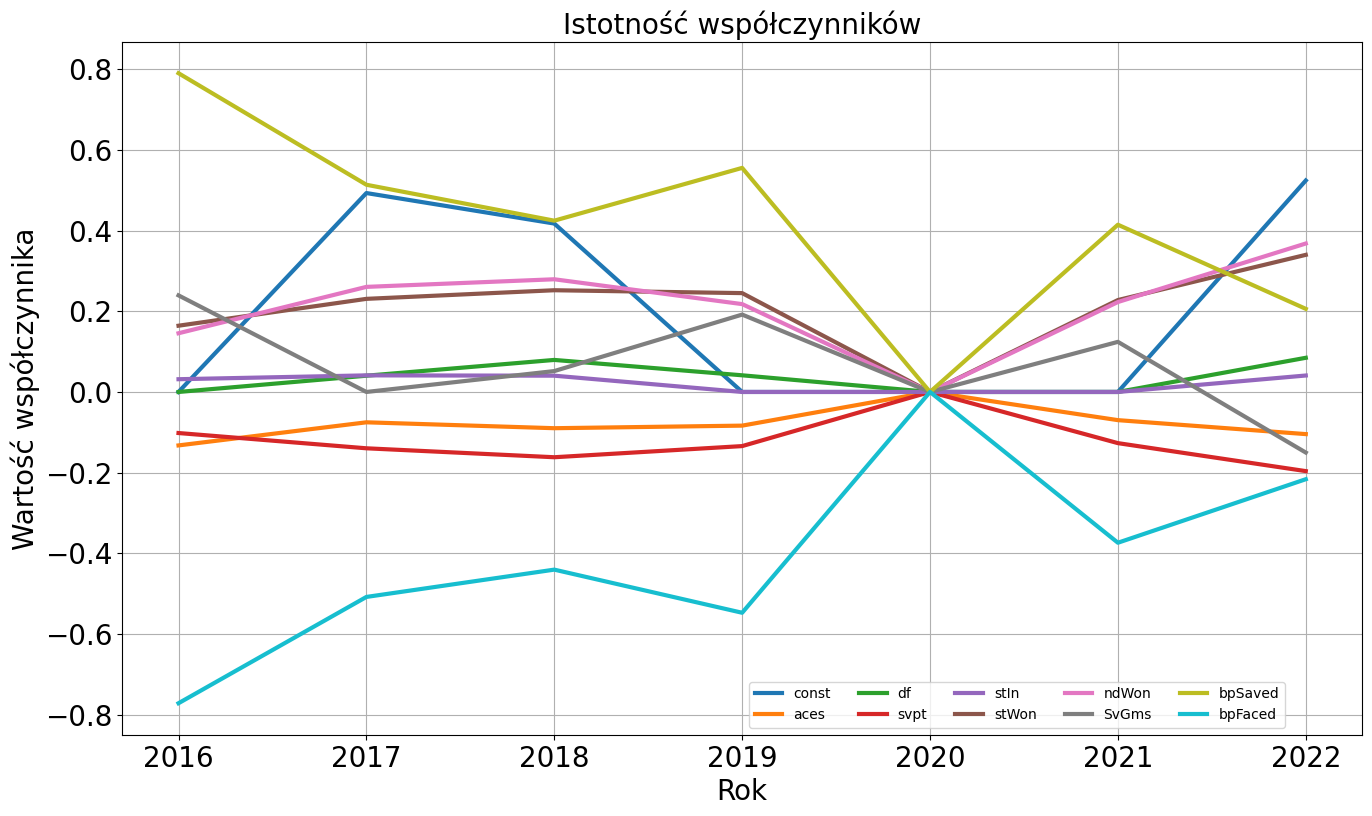

In [ ]:
param_names = col_names_pom
plt.figure(figsize=(16, 9))
for i in range(len(L)):
    plt.plot(np.linspace(2022, 2016, 7), L[i], label = str(col_names_pom[i]), linewidth = 3)
plt.xlabel("Rok", fontsize = 20)
plt.ylabel("Wartość współczynnika", fontsize = 20)
plt.title("Istotność współczynników", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(ncol = 5, bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.grid()
plt.savefig("WYKRES12_w.pdf")

In [ ]:
L = [[], [], [], [], [], [], [], [], [], [],]
p = 1
for j in range(2022, 2015, -1):
    l = 0
    l_pom = []
    for i in range(len(RG_w.iloc[:,20])): #Hard
        if RG_w.iloc[i, 0][:4] == str(j):
            l += 1
            l_pom.append(i)
    print(j)
    pom_df = dataframe_w.iloc[lj_RG_w[j-2024],]
    y_pom = list(dataframe_w.iloc[lj_RG_w[j-2024], 0])
    X_pom = pom_df[col_names]

    X_pom = sm.add_constant(X_pom)

    model_pom = sm.Logit(y_pom, X_pom)

    result_pom = model_pom.fit(disp=0)
    if j == 2022:
        print(result_pom.summary())
    maxi = 0
    for i in range(1, len(result_pom.pvalues)):
        if maxi < result_pom.pvalues[i]:
            maxi = result_pom.pvalues[i]
            J = i
    if maxi < 0.05:
        if result_pom.pvalues[0] >= 0.05:
            X_pom = X_pom.drop(columns=[X_pom.columns[0]])

            model_pom = sm.Logit(y_pom, X_pom)

            result_pom = model_pom.fit(disp=0)
            maxi = 0
            for i in range(1, len(result_pom.pvalues)):
                if maxi < result_pom.pvalues[i]:
                    maxi = result_pom.pvalues[i]
                    J = i
            if maxi >= 0.05:
                X_pom = X_pom.drop(columns=[X_pom.columns[J]])

                model_pom = sm.Logit(y_pom, X_pom)

                result_pom = model_pom.fit(disp=0)
                maxi = 0
                for i in range(1, len(result_pom.pvalues)):
                    if maxi < result_pom.pvalues[i]:
                        maxi = result_pom.pvalues[i]
                        J = i
                if maxi >= 0.05:
                    X_pom = X_pom.drop(columns=[X_pom.columns[J]])

                    model_pom = sm.Logit(y_pom, X_pom)

                    result_pom = model_pom.fit(disp=0)
    else:
        X_pom = X_pom.drop(columns=[X_pom.columns[J]])

        model_pom = sm.Logit(y_pom, X_pom)

        result_pom = model_pom.fit(disp=0)
        maxi = 0
        for i in range(1, len(result_pom.pvalues)):
            if maxi < result_pom.pvalues[i]:
                maxi = result_pom.pvalues[i]
                J = i
        if maxi < 0.05:
            if result_pom.pvalues[0] >= 0.05:
                X_pom = X_pom.drop(columns=[X_pom.columns[0]])

                model_pom = sm.Logit(y_pom, X_pom)

                result_pom = model_pom.fit(disp=0)
                maxi = 0
                for i in range(1, len(result_pom.pvalues)):
                    if maxi < result_pom.pvalues[i]:
                        maxi = result_pom.pvalues[i]
                        J = i
                if maxi >= 0.05:
                    X_pom = X_pom.drop(columns=[X_pom.columns[J]])

                    model_pom = sm.Logit(y_pom, X_pom)

                    result_pom = model_pom.fit(disp=0)

        else:
            X_pom = X_pom.drop(columns=[X_pom.columns[J]])

            model_pom = sm.Logit(y_pom, X_pom)

            result_pom = model_pom.fit(disp=0)
            maxi = 0
            for i in range(1, len(result_pom.pvalues)):
                if maxi < result_pom.pvalues[i]:
                    maxi = result_pom.pvalues[i]
                    J = i
            if result_pom.pvalues[0] >= 0.05:
                X_pom = X_pom.drop(columns=[X_pom.columns[0]])

                model_pom = sm.Logit(y_pom, X_pom)

                result_pom = model_pom.fit(disp=0)
            else:
                X_pom = X_pom.drop(columns=[X_pom.columns[J]])

                model_pom = sm.Logit(y_pom, X_pom)

                result_pom = model_pom.fit(disp=0)
                maxi = 0
                for i in range(1, len(result_pom.pvalues)):
                    if maxi < result_pom.pvalues[i]:
                        maxi = result_pom.pvalues[i]
                        J = i
                if result_pom.pvalues[0] >= 0.05:
                    X_pom = X_pom.drop(columns=[X_pom.columns[0]])

                    model_pom = sm.Logit(y_pom, X_pom)

                    result_pom = model_pom.fit(disp=0)

    #print(result_pom.summary())
    cols = result_pom.params.index.tolist()
    for i in range(len(L)-1, -1, -1):
        for k in range(len(cols)):
            if col_names_pom[i] == cols[k]:
                L[i].append(result_pom.params[k])
    for i in range(len(L)):
        if len(L[i]) != p:
            L[i].append(0)
    pop1 = RG_w.iloc[l_pom, 27:36]
    pop1.columns = col_names
    pop2 = RG_w.iloc[l_pom, 36:45]
    pop2.columns = col_names
    frames = [pop1, pop2]
    pop = pd.concat(frames)
    pop = sm.add_constant(pop)
    expo = []
    for i in range(len(l_pom)):
        expo.append(np.exp(L[0][p-1] + L[1][p-1] * RG_w.iloc[l_pom[i], 27] + L[2][p-1] * RG_w.iloc[l_pom[i], 28] + L[3][p-1] * RG_w.iloc[l_pom[i], 29] + L[4][p-1] * RG_w.iloc[l_pom[i], 30] + L[5][p-1] * RG_w.iloc[l_pom[i], 31] + L[6][p-1] * RG_w.iloc[l_pom[i], 32] + L[7][p-1] * RG_w.iloc[l_pom[i], 33] + L[8][p-1] * RG_w.iloc[l_pom[i], 34] + L[9][p-1] * RG_w.iloc[l_pom[i], 35]))
        expo.append(np.exp(L[0][p-1] + L[1][p-1] * RG_w.iloc[l_pom[i], 36] + L[2][p-1] * RG_w.iloc[l_pom[i], 37] + L[3][p-1] * RG_w.iloc[l_pom[i], 38] + L[4][p-1] * RG_w.iloc[l_pom[i], 39] + L[5][p-1] * RG_w.iloc[l_pom[i], 40] + L[6][p-1] * RG_w.iloc[l_pom[i], 41] + L[7][p-1] * RG_w.iloc[l_pom[i], 42] + L[8][p-1] * RG_w.iloc[l_pom[i], 43] + L[9][p-1] * RG_w.iloc[l_pom[i], 44]))
    f = []
    for i in range(len(expo)):
        f.append(expo[i]/(1 + expo[i]))
    foo, bar = zip(*sorted(zip(f, l * [1, 0])))
    index = [i for i in range(2 * len(l_pom))]
    ll = 0
    for i in range(int(len(index)/2)):
        if bar[i] == 1:
            ll += 1
    print("Skuteczność regresji: ", 1 - (ll/(len(index)/2)))
    p += 1
    if j == 2022:
        print(result_pom.summary())

2022
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1450
Model:                          Logit   Df Residuals:                     1440
Method:                           MLE   Df Model:                            9
Date:                Sun, 14 Jan 2024   Pseudo R-squ.:                  0.4088
Time:                        00:45:12   Log-Likelihood:                -594.16
converged:                       True   LL-Null:                       -1005.1
Covariance Type:            nonrobust   LLR p-value:                4.286e-171
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6780      0.300      2.260      0.024       0.090       1.266
aces          -0.1299      0.036     -3.575      0.000      -0.201      -0.059
df             0.1585      0.034      4.596    

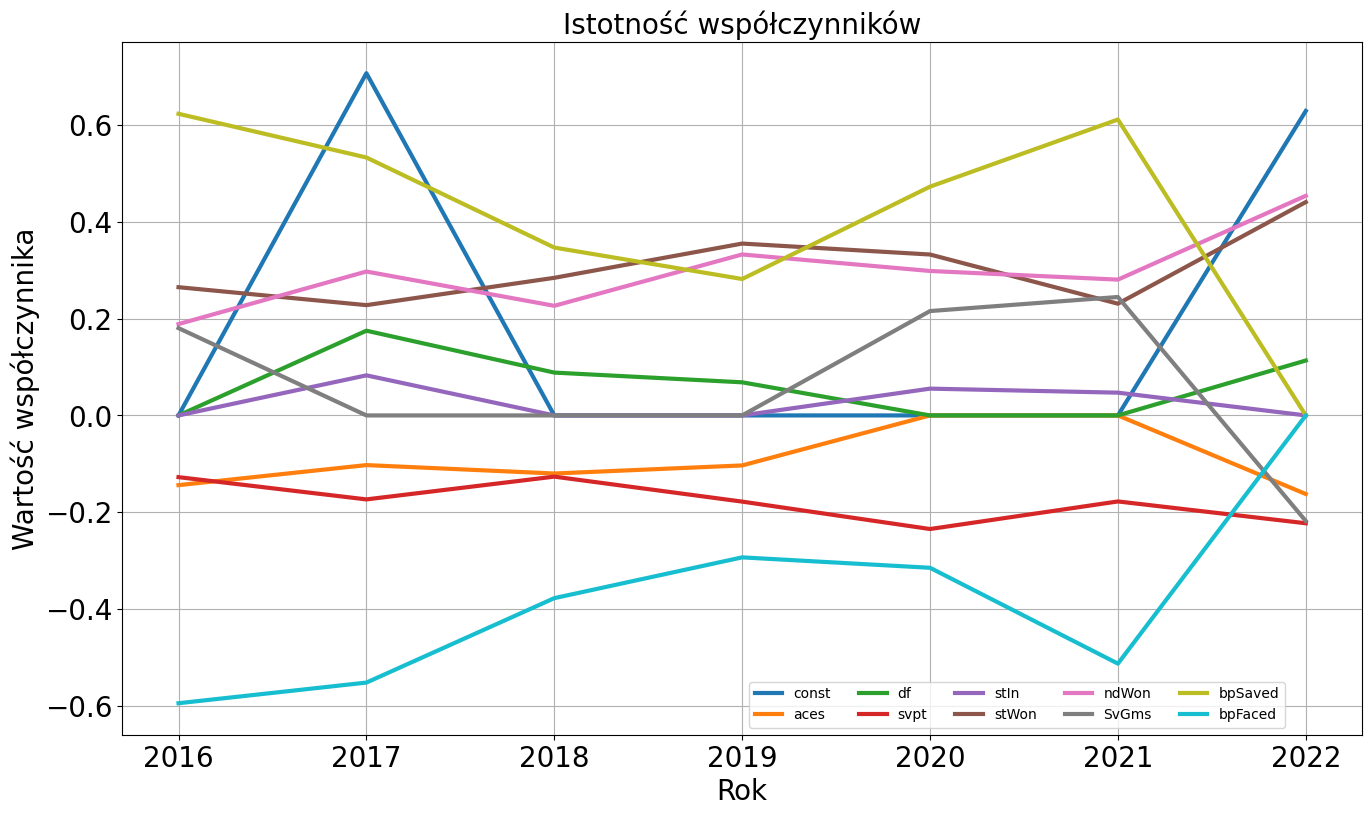

In [ ]:
param_names = col_names_pom
plt.figure(figsize=(16, 9))
for i in range(len(L)):
    plt.plot(np.linspace(2022, 2016, 7), L[i], label = str(col_names_pom[i]), linewidth = 3)
plt.xlabel("Rok", fontsize = 20)
plt.ylabel("Wartość współczynnika", fontsize = 20)
plt.title("Istotność współczynników", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(ncol = 5, bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.grid()
plt.savefig("WYKRES13_w.pdf")

In [ ]:
lll = 0
for i in range(l):
    if f[2*i] > f[2*i + 1]:
        if f[2*i] > 0.5:
            if f[2*i + 1] < 0.5:
                lll += 1
lll/l

0.728

In [ ]:
L = [[], [], [], [], [], [], [], [], []]
for j in range(2022, 2015, -1):
    l = 0
    l_pom = []
    for i in range(len(AU_w.iloc[:,20])): #Clay
        if AU_w.iloc[i, 0][:4] == str(j):
            l += 1
            l_pom.append(i)
    print(j)
    pom_df = dataframe_w.iloc[lj_AU_w[j-2024],]
    y_pom = list(dataframe_w.iloc[lj_AU_w[j-2024], 0])
    X_pom = pom_df[col_names]
    pop1 = AU_w.iloc[l_pom, 27:36]
    pop1.columns = col_names
    pop2 = AU_w.iloc[l_pom, 36:45]
    pop2.columns = col_names
    frames = [pop1, pop2]
    pop = pd.concat(frames)
    clf_m = DecisionTreeClassifier(min_impurity_decrease = 0.005)
    clf_m = clf_m.fit(X_pom, y_pom)
    importances = clf_m.feature_importances_
# Wyświetl kryteria podziału dla każdej cechy
    for feature, importance in enumerate(importances):
        L[feature].append(importance)
    y_pred = clf_m.predict(pop)
    y_test = l * [1] + l * [0]
    print(metrics.accuracy_score(y_test, y_pred))
#for i in range(9):
#   L[i] = sum(L[i])/8

2022
0.7682926829268293
2021
0.7777777777777778
2020
0.7204724409448819
2019
0.812
2018
0.7795275590551181
2017
0.7682926829268293
2016
0.746031746031746


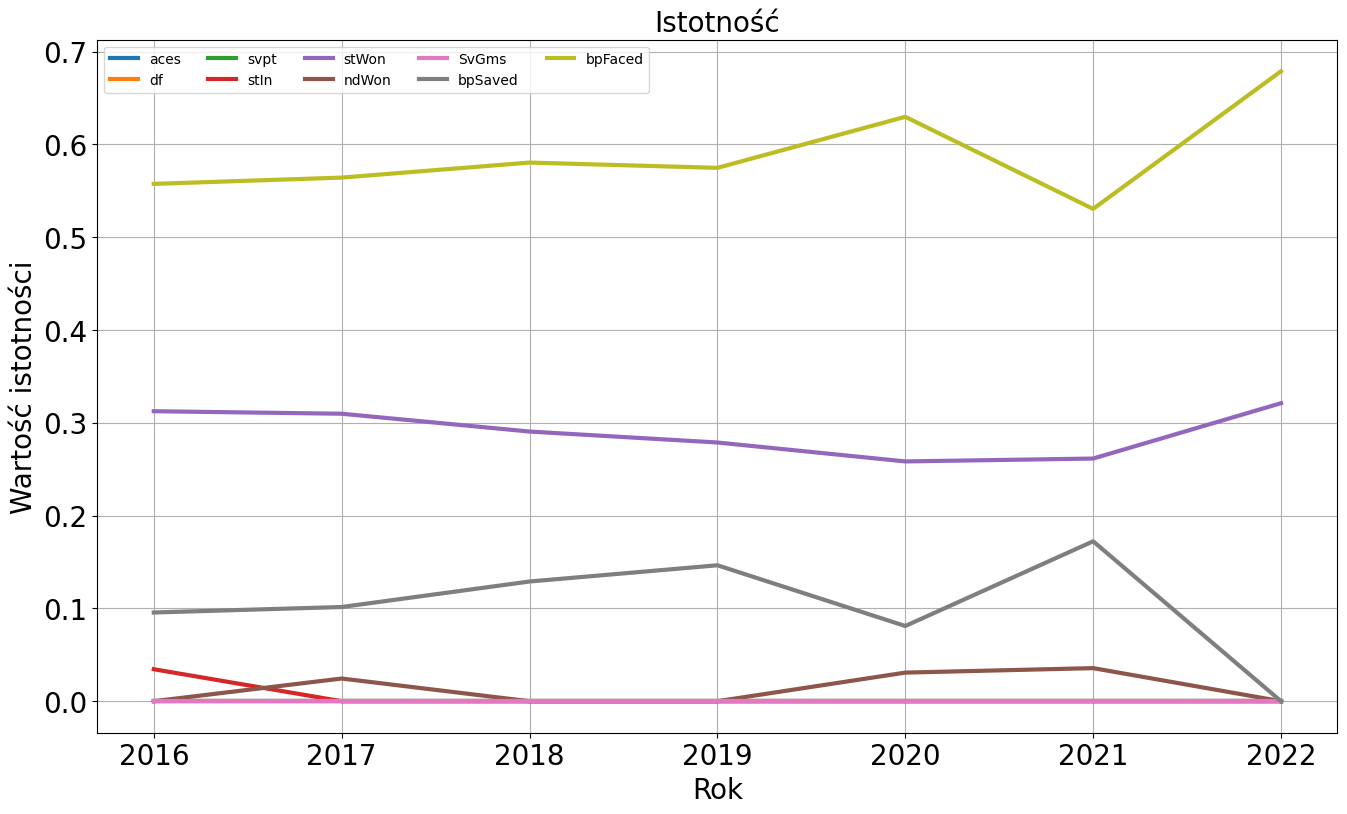

In [ ]:
plt.figure(figsize=(16, 9))
for i in range(len(L)):
    plt.plot(np.linspace(2022, 2016, 7), L[i], label = str(col_names[i]), linewidth = 3)
plt.xlabel("Rok", fontsize = 20)
plt.ylabel("Wartość istotności", fontsize = 20)
plt.title("Istotność", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(ncol = 5, loc = "upper left")
plt.grid()
plt.savefig("wykres1.pdf")

In [ ]:
L = [[], [], [], [], [], [], [], [], []]
for j in range(2022, 2015, -1):
    l = 0
    l_pom = []
    for i in range(len(US_w.iloc[:,20])): #Clay
        if US_w.iloc[i, 0][:4] == str(j):
            l += 1
            l_pom.append(i)
    print(j)
    pom_df = dataframe_w.iloc[lj_US_w[j-2023],]
    y_pom = list(dataframe_w.iloc[lj_US_w[j-2023], 0])
    X_pom = pom_df[col_names]
    pop1 = US_w.iloc[l_pom, 27:36]
    pop1.columns = col_names
    pop2 = US_w.iloc[l_pom, 36:45]
    pop2.columns = col_names
    frames = [pop1, pop2]
    pop = pd.concat(frames)
    clf_m = DecisionTreeClassifier(min_impurity_decrease = 0.005)
    clf_m = clf_m.fit(X_pom, y_pom)
    importances = clf_m.feature_importances_
    for feature, importance in enumerate(importances):
        L[feature].append(importance)
    y_pred = clf_m.predict(pop)
    y_test = l * [1] + l * [0]
    print(metrics.accuracy_score(y_test, y_pred))
    if j == 2022:
        dot_data_m = StringIO()
        export_graphviz(clf_m, out_file=dot_data_m,
                        filled=True, rounded=True,
                        special_characters=True, feature_names = col_names, class_names=['0','1'])
        graph_m = pydotplus.graph_from_dot_data(dot_data_m.getvalue())
        graph_m.write_png('WYKRES1_2.pdf')
        Image(graph_m.create_png())
        clf_m = DecisionTreeClassifier(criterion = "entropy", min_impurity_decrease = 0.01)
        clf_m = clf_m.fit(X_pom, y_pom)
        dot_data_m = StringIO()
        export_graphviz(clf_m, out_file=dot_data_m,
                        filled=True, rounded=True,
                        special_characters=True, feature_names = col_names, class_names=['0','1'])
        graph_m = pydotplus.graph_from_dot_data(dot_data_m.getvalue())
        graph_m.write_png('WYKRES1_1.pdf')
        Image(graph_m.create_png())
#for i in range(9):
#    L[i] = sum(L[i])/8

2022
0.744
2021
0.7698412698412699
2020
0.7857142857142857
2019
0.764
2018
0.7380952380952381
2017
0.7480314960629921
2016
0.78


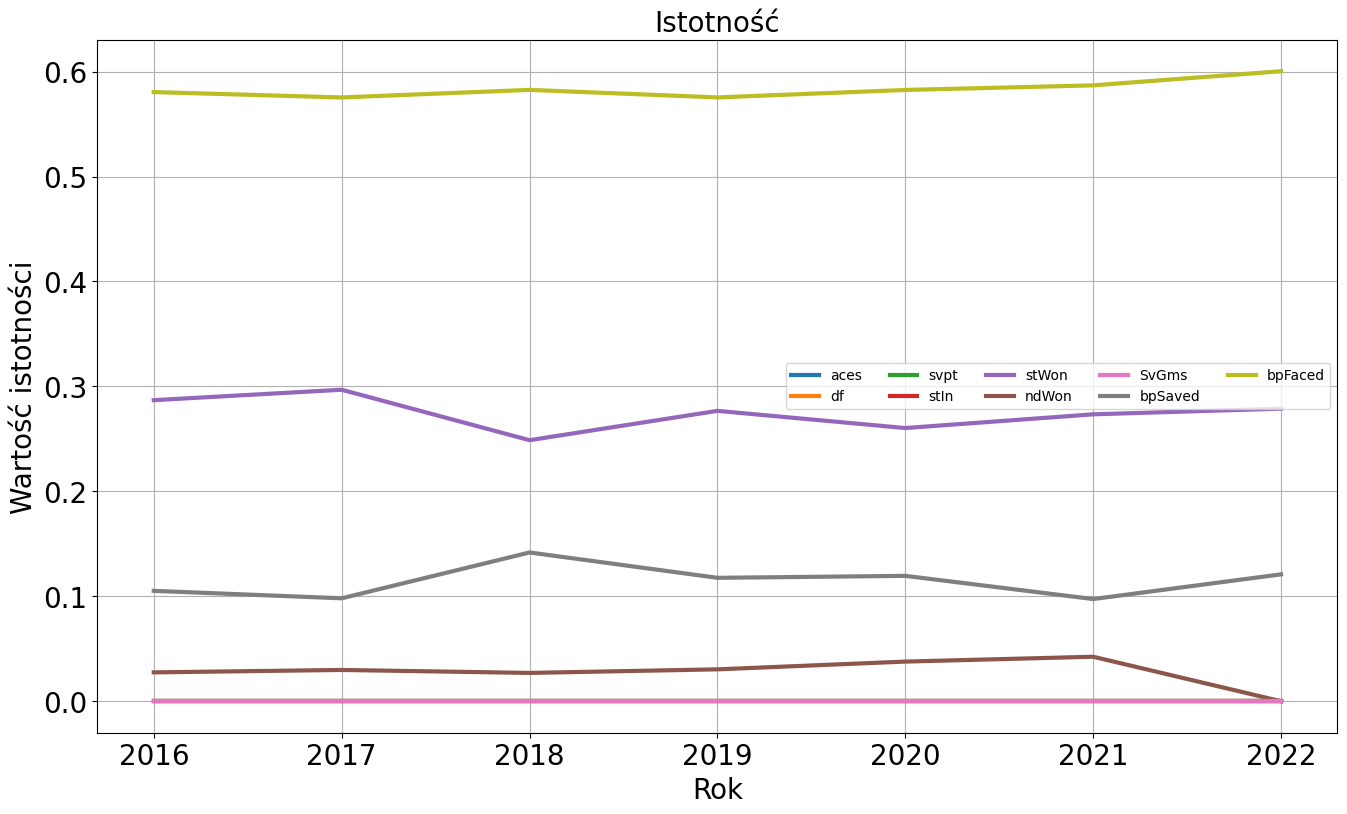

In [ ]:
plt.figure(figsize=(16, 9))
for i in range(len(L)):
    plt.plot(np.linspace(2022, 2016, 7), L[i], label = str(col_names[i]), linewidth = 3)
plt.xlabel("Rok", fontsize = 20)
plt.ylabel("Wartość istotności", fontsize = 20)
plt.title("Istotność", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(ncol = 5, loc = "center right")
plt.grid()
plt.savefig("wykres2.pdf")

In [ ]:
L = [[], [], [], [], [], [], [], [], []]
for j in range(2022, 2020, -1):
    l = 0
    l_pom = []
    for i in range(len(WB_w.iloc[:,20])): #Clay
        if WB_w.iloc[i, 0][:4] == str(j):
            l += 1
            l_pom.append(i)
    print(j)
    pom_df = dataframe_w.iloc[lj_WB_w[j-2024],]
    y_pom = list(dataframe_w.iloc[lj_WB_w[j-2024], 0])
    X_pom = pom_df[col_names]
    pop1 = WB_w.iloc[l_pom, 27:36]
    pop1.columns = col_names
    pop2 = WB_w.iloc[l_pom, 36:45]
    pop2.columns = col_names
    frames = [pop1, pop2]
    pop = pd.concat(frames)
    clf_m = DecisionTreeClassifier(min_impurity_decrease = 0.005)
    clf_m = clf_m.fit(X_pom, y_pom)
    importances = clf_m.feature_importances_
    for feature, importance in enumerate(importances):
        L[feature].append(importance)
    y_pred = clf_m.predict(pop)
    y_test = l * [1] + l * [0]
    print(metrics.accuracy_score(y_test, y_pred))

2022
0.764
2021
0.788


In [ ]:
for i in range(len(L)):
    L[i].append(0)

In [ ]:
for j in range(2019, 2015, -1):
    l = 0
    l_pom = []
    for i in range(len(WB_w.iloc[:,20])): #Clay
        if WB_w.iloc[i, 0][:4] == str(j):
            l += 1
            l_pom.append(i)
    print(j)
    pom_df = dataframe_w.iloc[lj_WB_w[j-2023],]
    y_pom = list(dataframe_w.iloc[lj_WB_w[j-2023], 0])
    X_pom = pom_df[col_names]
    pop1 = WB_w.iloc[l_pom, 27:36]
    pop1.columns = col_names
    pop2 = WB_w.iloc[l_pom, 36:45]
    pop2.columns = col_names
    frames = [pop1, pop2]
    pop = pd.concat(frames)
    clf_m = DecisionTreeClassifier(min_impurity_decrease = 0.005)
    clf_m = clf_m.fit(X_pom, y_pom)
    importances = clf_m.feature_importances_
    for feature, importance in enumerate(importances):
        L[feature].append(importance)
    y_pred = clf_m.predict(pop)
    y_test = l * [1] + l * [0]
    print(metrics.accuracy_score(y_test, y_pred))
#for i in range(9):
#    L[i] = sum(L[i])/6

2019
0.7782258064516129
2018
0.7244094488188977
2017
0.7620967741935484
2016
0.782258064516129


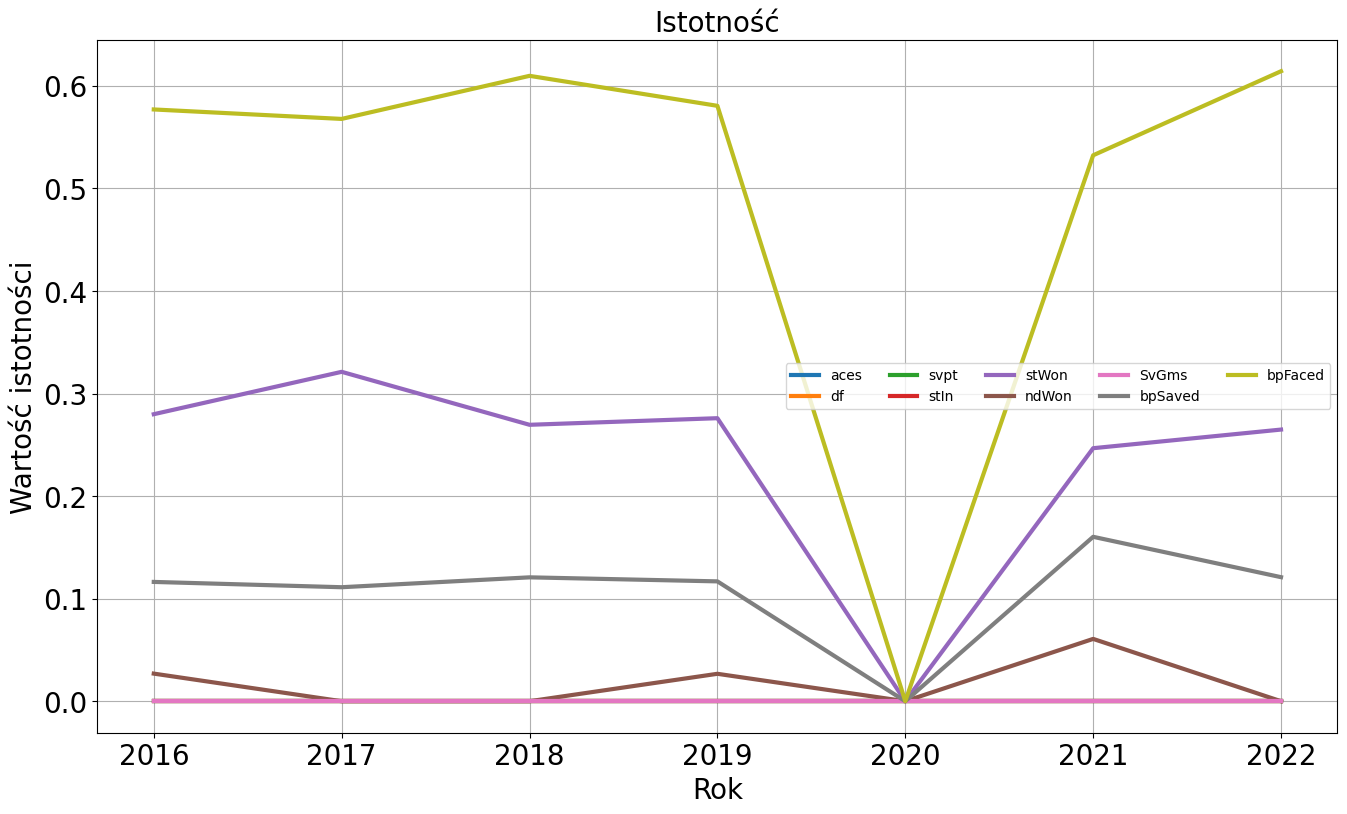

In [ ]:
plt.figure(figsize=(16, 9))
for i in range(len(L)):
    plt.plot(np.linspace(2022, 2016, 7), L[i], label = str(col_names[i]), linewidth = 3)
plt.xlabel("Rok", fontsize = 20)
plt.ylabel("Wartość istotności", fontsize = 20)
plt.title("Istotność", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(ncol = 5, loc = "center right")
plt.grid()
plt.savefig("wykres3.pdf")

In [ ]:
L = [[], [], [], [], [], [], [], [], []]
for j in range(2022, 2015, -1):
    l = 0
    l_pom = []
    for i in range(len(RG_w.iloc[:,20])): #Clay
        if RG_w.iloc[i, 0][:4] == str(j):
            l += 1
            l_pom.append(i)
    print(j)
    pom_df = dataframe_w.iloc[lj_RG_w[j-2024],]
    y_pom = list(dataframe_w.iloc[lj_RG_w[j-2024], 0])
    X_pom = pom_df[col_names]
    pop1 = RG_w.iloc[l_pom, 27:36]
    pop1.columns = col_names
    pop2 = RG_w.iloc[l_pom, 36:45]
    pop2.columns = col_names
    frames = [pop1, pop2]
    pop = pd.concat(frames)
    clf_m = DecisionTreeClassifier(min_impurity_decrease = 0.005)
    clf_m = clf_m.fit(X_pom, y_pom)
    importances = clf_m.feature_importances_
    for feature, importance in enumerate(importances):
        L[feature].append(importance)
    y_pred = clf_m.predict(pop)
    y_test = l * [1] + l * [0]
    print(metrics.accuracy_score(y_test, y_pred))
#for i in range(9):
#    L[i] = sum(L[i])/8

2022
0.7627118644067796
2021
0.7845528455284553
2020
0.6612903225806451
2019
0.7398373983739838
2018
0.788
2017
0.7182539682539683
2016
0.8


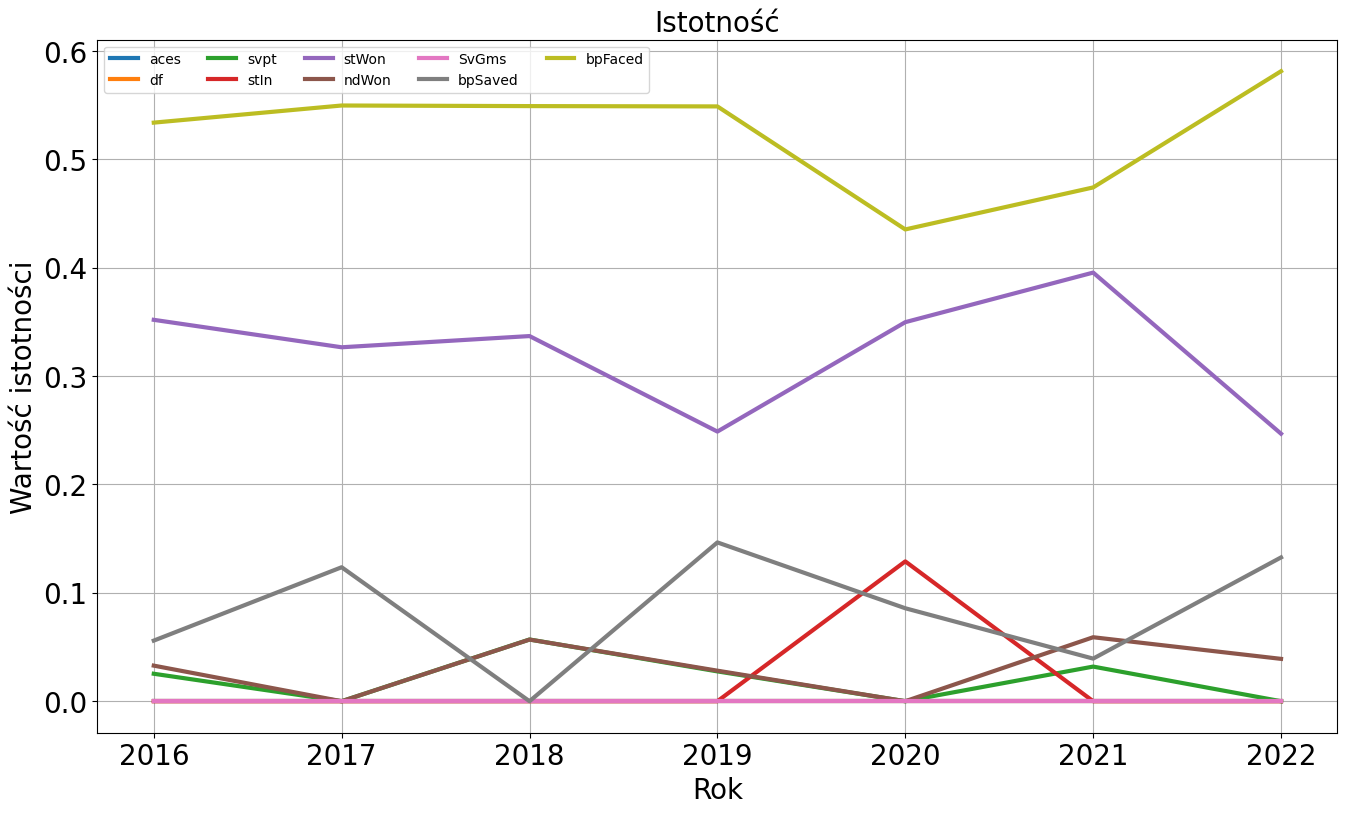

In [ ]:
plt.figure(figsize=(16, 9))
for i in range(len(L)):
    plt.plot(np.linspace(2022, 2016, 7), L[i], label = str(col_names[i]), linewidth = 3)
plt.xlabel("Rok", fontsize = 20)
plt.ylabel("Wartość istotności", fontsize = 20)
plt.title("Istotność", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(ncol = 5, loc = "upper left")
plt.grid()
plt.savefig("wykres4.pdf")

In [ ]:
L = [[], [], [], [], [], [], [], [], []]
for j in range(2022, 2001, -1):
    l = 0
    l_pom = []
    for i in range(len(AU_m.iloc[:,20])): #Clay
        if AU_m.iloc[i, 0][:4] == str(j):
            l += 1
            l_pom.append(i)
    pom_df = dataframe_m.iloc[lj_AU_m[j-2024],]
    y_pom = list(dataframe_m.iloc[lj_AU_m[j-2024], 0])
    X_pom = pom_df[col_names]
    pop1 = AU_m.iloc[l_pom, 27:36]
    pop1.columns = col_names
    pop2 = AU_m.iloc[l_pom, 36:45]
    pop2.columns = col_names
    frames = [pop1, pop2]
    pop = pd.concat(frames)
    clf_m = DecisionTreeClassifier(min_impurity_decrease = 0.005)
    clf_m = clf_m.fit(X_pom, y_pom)
    importances = clf_m.feature_importances_
    for feature, importance in enumerate(importances):
        L[feature].append(importance)
    y_pred = clf_m.predict(pop)
    y_test = l * [1] + l * [0]
    print(metrics.accuracy_score(y_test, y_pred))
#for i in range(9):
#    L[i] = sum(L[i])/22

0.736
0.7355371900826446
0.75
0.7
0.7357723577235772
0.7418032786885246
0.7362204724409449
0.7113821138211383
0.7692307692307693
0.7601626016260162
0.7203389830508474
0.7663934426229508
0.6983471074380165
0.7520661157024794
0.7560975609756098
0.75
0.7231404958677686
0.756198347107438
0.6875
0.673728813559322
0.7254098360655737


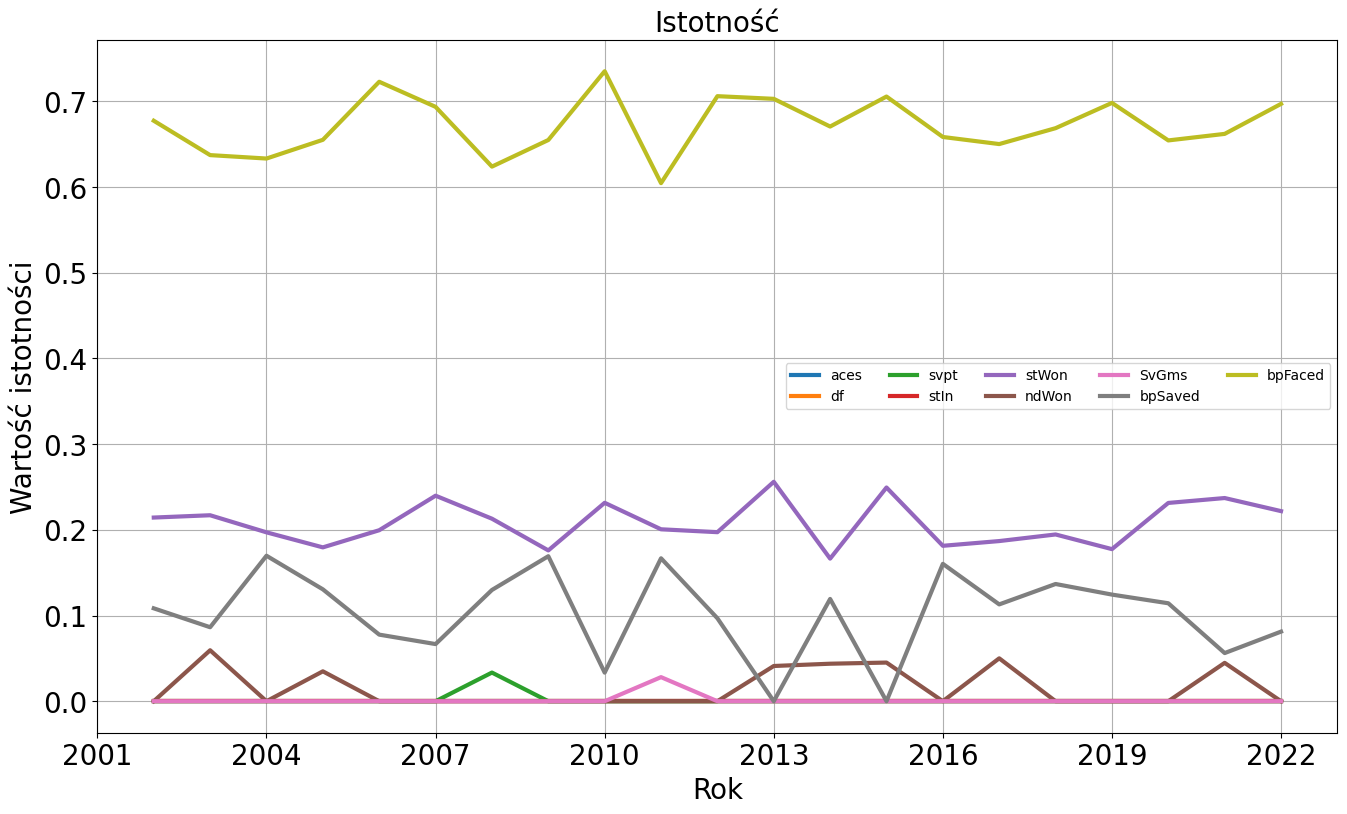

In [ ]:
plt.figure(figsize=(16, 9))
for i in range(len(L)):
    plt.plot(np.linspace(2022, 2002, 21), L[i], label = str(col_names[i]), linewidth = 3)
plt.xlabel("Rok", fontsize = 20)
plt.ylabel("Wartość istotności", fontsize = 20)
plt.title("Istotność", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(ncol = 5, loc = "center right")
plt.grid()
plt.savefig("wykres5.pdf")

In [ ]:
L = [[], [], [], [], [], [], [], [], []]
for j in range(2022, 2001, -1):
    l = 0
    l_pom = []
    for i in range(len(US_m.iloc[:,20])): #Clay
        if US_m.iloc[i, 0][:4] == str(j):
            l += 1
            l_pom.append(i)
    pom_df = dataframe_m.iloc[lj_US_m[j-2023],]
    y_pom = list(dataframe_m.iloc[lj_US_m[j-2023], 0])
    X_pom = pom_df[col_names]
    pop1 = US_m.iloc[l_pom, 27:36]
    pop1.columns = col_names
    pop2 = US_m.iloc[l_pom, 36:45]
    pop2.columns = col_names
    frames = [pop1, pop2]
    pop = pd.concat(frames)
    clf_m = DecisionTreeClassifier(min_impurity_decrease = 0.005)
    clf_m = clf_m.fit(X_pom, y_pom)
    importances = clf_m.feature_importances_
    for feature, importance in enumerate(importances):
        L[feature].append(importance)
#for i in range(9):
#    L[i] = sum(L[i])/22

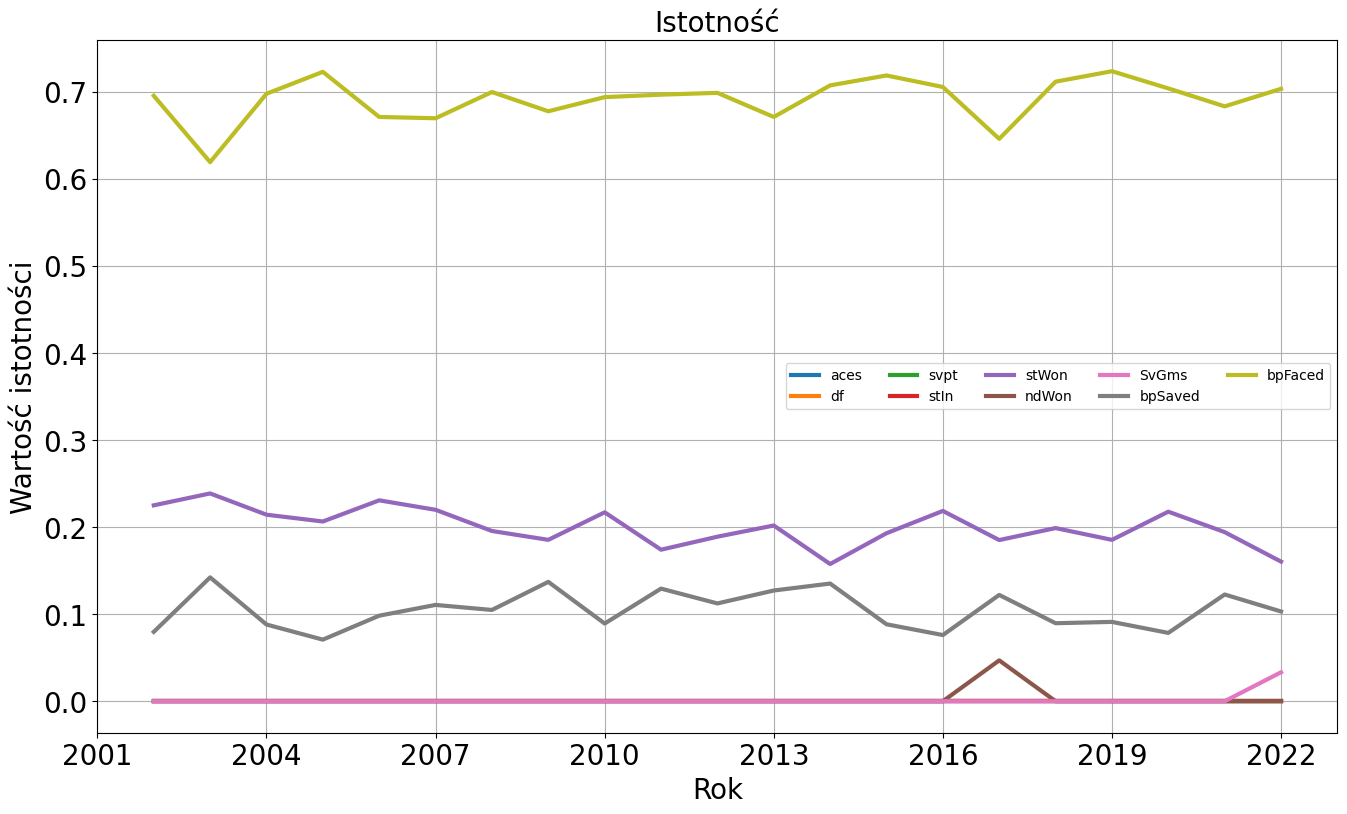

In [ ]:
plt.figure(figsize=(16, 9))
for i in range(len(L)):
    plt.plot(np.linspace(2022, 2002, 21), L[i], label = str(col_names[i]), linewidth = 3)
plt.xlabel("Rok", fontsize = 20)
plt.ylabel("Wartość istotności", fontsize = 20)
plt.title("Istotność", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(ncol = 5, loc = "center right")
plt.grid()
plt.savefig("wykres6.pdf")

In [ ]:
L = [[], [], [], [], [], [], [], [], []]
for j in range(2022, 2020, -1):
    l = 0
    l_pom = []
    for i in range(len(WB_m.iloc[:,20])): #Clay
        if WB_m.iloc[i, 0][:4] == str(j):
            l += 1
            l_pom.append(i)
    pom_df = dataframe_m.iloc[lj_WB_m[j-2024],]
    y_pom = list(dataframe_m.iloc[lj_WB_m[j-2024], 0])
    X_pom = pom_df[col_names]
    pop1 = WB_m.iloc[l_pom, 27:36]
    pop1.columns = col_names
    pop2 = WB_m.iloc[l_pom, 36:45]
    pop2.columns = col_names
    frames = [pop1, pop2]
    pop = pd.concat(frames)
    clf_m = DecisionTreeClassifier(min_impurity_decrease = 0.005)
    clf_m = clf_m.fit(X_pom, y_pom)
    importances = clf_m.feature_importances_
    for feature, importance in enumerate(importances):
        L[feature].append(importance)

In [ ]:
for i in range(len(L)):
    L[i].append(0)

In [ ]:
for j in range(2019, 2001, -1):
    l = 0
    l_pom = []
    for i in range(len(WB_m.iloc[:,20])): #Clay
        if WB_m.iloc[i, 0][:4] == str(j):
            l += 1
            l_pom.append(i)
    pom_df = dataframe_m.iloc[lj_WB_m[j-2023],]
    y_pom = list(dataframe_m.iloc[lj_WB_m[j-2023], 0])
    X_pom = pom_df[col_names]
    pop1 = WB_m.iloc[l_pom, 27:36]
    pop1.columns = col_names
    pop2 = WB_m.iloc[l_pom, 36:45]
    pop2.columns = col_names
    frames = [pop1, pop2]
    pop = pd.concat(frames)
    clf_m = DecisionTreeClassifier(min_impurity_decrease = 0.005)
    clf_m = clf_m.fit(X_pom, y_pom)
    importances = clf_m.feature_importances_
    for feature, importance in enumerate(importances):
        L[feature].append(importance)
#for i in range(9):
#    L[i] = sum(L[i])/21

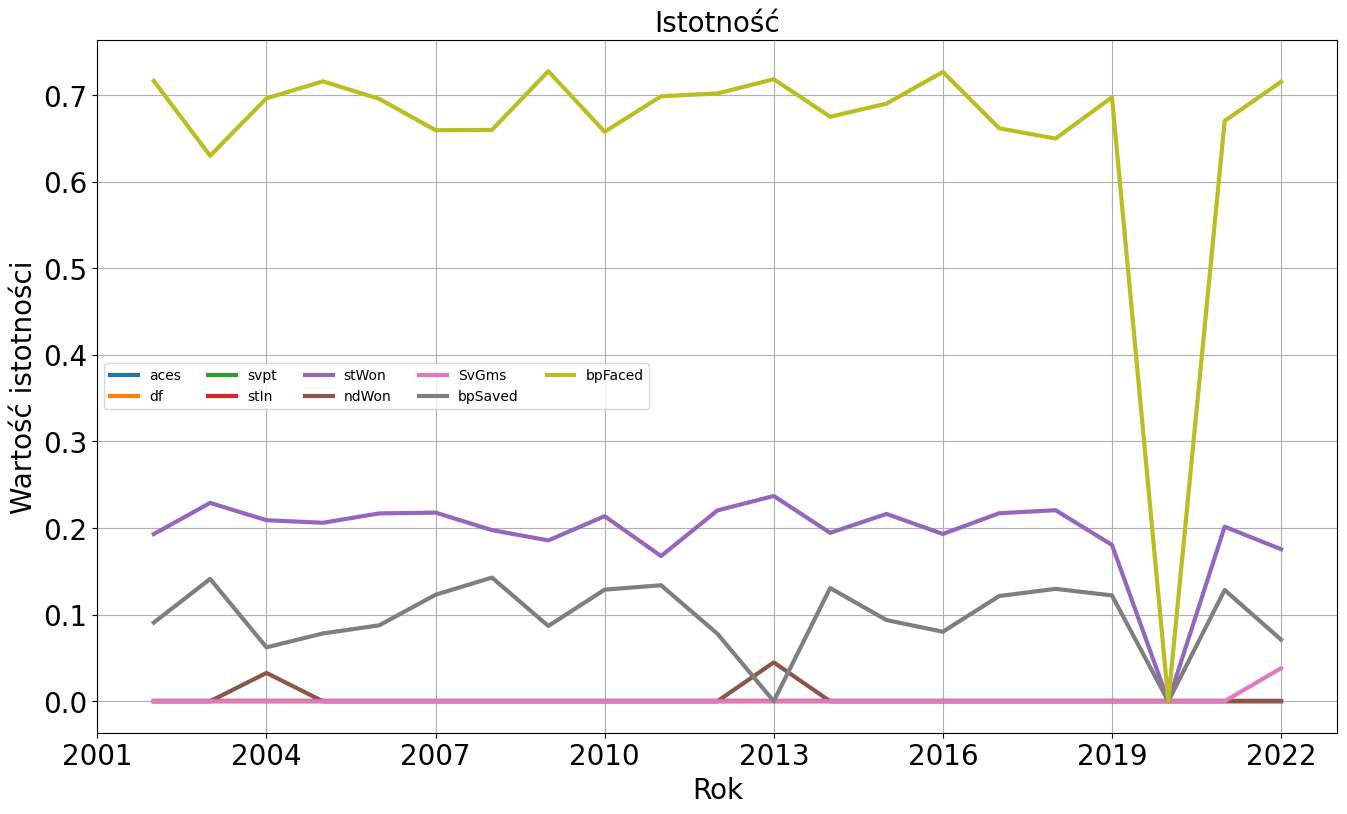

In [ ]:
plt.figure(figsize=(16, 9))
for i in range(len(L)):
    plt.plot(np.linspace(2022, 2002, 21), L[i], label = str(col_names[i]), linewidth = 3)
plt.xlabel("Rok", fontsize = 20)
plt.ylabel("Wartość istotności", fontsize = 20)
plt.title("Istotność", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(ncol = 5, loc = "center left")
plt.grid()
plt.savefig("wykres7.pdf")

In [ ]:
L = [[], [], [], [], [], [], [], [], []]
for j in range(2022, 2001, -1):
    l = 0
    l_pom = []
    for i in range(len(RG_m.iloc[:,20])): #Clay
        if RG_m.iloc[i, 0][:4] == str(j):
            l += 1
            l_pom.append(i)
    pom_df = dataframe_m.iloc[lj_RG_m[j-2024],]
    y_pom = list(dataframe_m.iloc[lj_RG_m[j-2024], 0])
    X_pom = pom_df[col_names]
    pop1 = RG_m.iloc[l_pom, 27:36]
    pop1.columns = col_names
    pop2 = RG_m.iloc[l_pom, 36:45]
    pop2.columns = col_names
    frames = [pop1, pop2]
    pop = pd.concat(frames)
    clf_m = DecisionTreeClassifier(min_impurity_decrease = 0.005)
    clf_m = clf_m.fit(X_pom, y_pom)
    importances = clf_m.feature_importances_
    for feature, importance in enumerate(importances):
        L[feature].append(importance)
#for i in range(9):
#    L[i] = sum(L[i])/22
#L

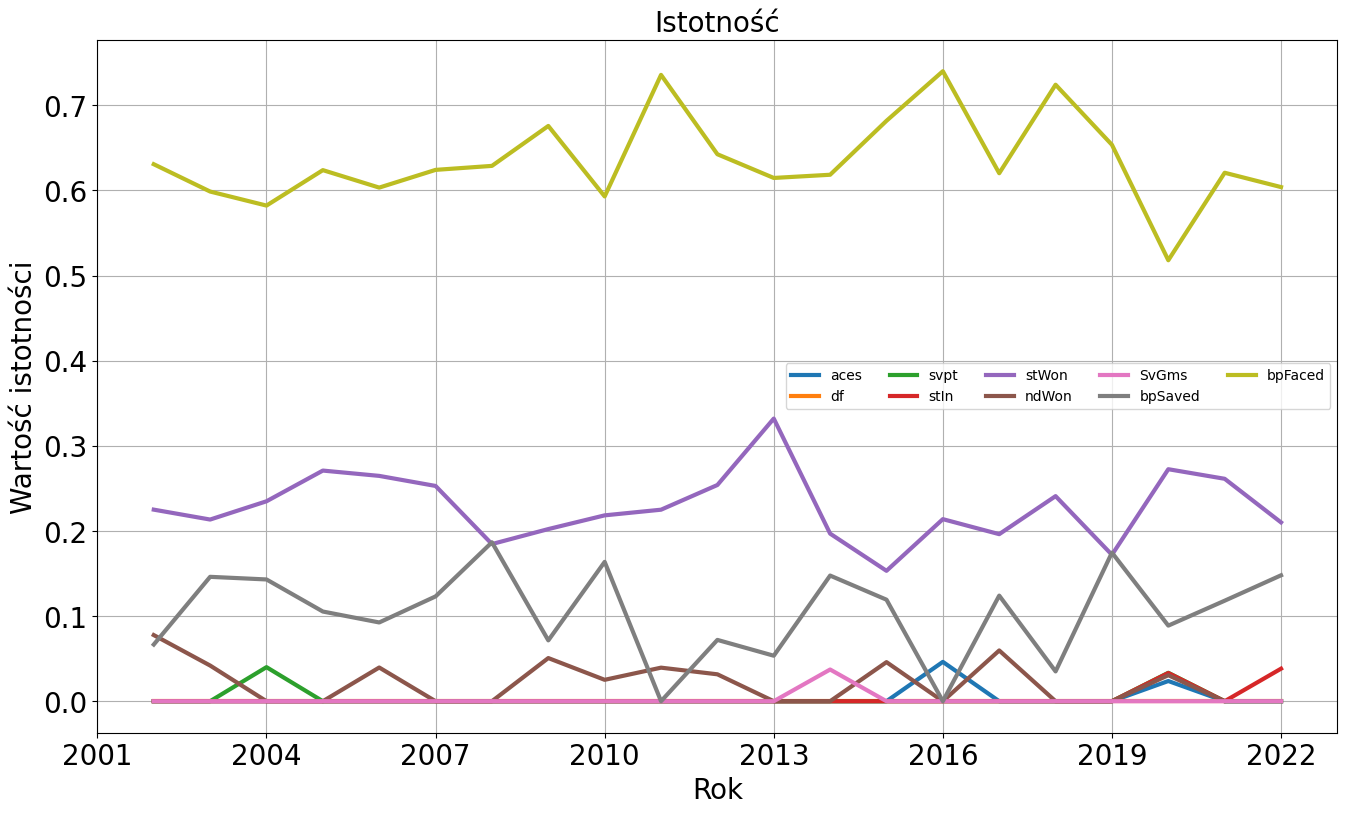

In [ ]:
plt.figure(figsize=(16, 9))
for i in range(len(L)):
    plt.plot(np.linspace(2022, 2002, 21), L[i], label = str(col_names[i]), linewidth = 3)
plt.xlabel("Rok", fontsize = 20)
plt.ylabel("Wartość istotności", fontsize = 20)
plt.title("Istotność", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(ncol = 5, loc = "center right")
plt.grid()
plt.savefig("wykres8.pdf")

In [ ]:
pop

,aces,df,svpt,stIn,stWon,ndWon,SvGms,bpSaved,bpFaced
121,5.0,4.0,118.0,59.0,40.0,34.0,17.0,10.0,13.0
122,6.0,6.0,117.0,57.0,38.0,32.0,20.0,2.0,7.0
123,11.0,2.0,155.0,98.0,56.0,31.0,24.0,8.0,16.0
124,4.0,8.0,97.0,64.0,42.0,19.0,13.0,11.0,14.0
125,14.0,4.0,85.0,50.0,39.0,21.0,13.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...
238,8.0,8.0,144.0,88.0,58.0,21.0,21.0,7.0,15.0
239,0.0,0.0,88.0,46.0,24.0,22.0,12.0,7.0,12.0
240,2.0,4.0,123.0,79.0,52.0,17.0,18.0,11.0,17.0
241,2.0,1.0,92.0,51.0,30.0,18.0,13.0,9.0,15.0
